## Model comparison file

File contains the comparison of the two cases of CRN model. Also loads a parameter file which can be edited in the LMFIT parameter object. The purpose of using the LMFIT object here is to specify the bounds on the parameters and can be easily exported to a different file where LMFIT has been used for parameter estimation.  

In [90]:
## Import all the packages in this cell

from biocrnpyler import *
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model

import pandas as pd
import numpy as np
import lmfit 

# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from matplotlib import style
%config InlineBackend.figure_format = 'retina'

style.use("default")

%matplotlib inline

# To import experimental data 

from expt_data_import import *

In [91]:
## Load the model and defining the timepoints

model_degtag = Model(sbml_filename = 'Biocrnpyler_model_degtag_070824.xml')
model_no_tag = Model(sbml_filename = 'Biocrnpyler_model_no_degtag_070824.xml')

N_steps = 1000
t_final = 1000
timepoints = np.linspace(0, t_final, N_steps)

tf_I = 720  # Time till we want to plot the simulation 
tf_i = 72   # Indice of the experimental data array till we want to plot the simulation

In [92]:
# Loading the experimental data 

[C, C_max, C_0, k_gr, C_max_avg, C_0_avg, k_gr_avg] = Get_OD_Data()
[A_non_leaky, time_A, B_non_leaky, time_B, avg_fold_change] = Get_FLOD_Data()

In [93]:
A1 = A_non_leaky[0][:tf_i]
A2 = A_non_leaky[1][:tf_i]
A3 = A_non_leaky[2][:tf_i]
A_avg = np.mean((A1,A2,A3), axis = 0)
A_max = np.max(A_avg)

In [94]:
## Wrote a function to pass the parameters of the model 

def run_CRN_model(param, model_degtag, model_no_tag, timepoints): 

    params = param.valuesdict() # params is an LMFIT object so values of parameters are extracted as a dictinory 

    Ribo_min = params['Ribo_min']

    tRNA_min = params['tRNA_min']
    
    RNAP_min = params['RNAP_min']

    Et_min = params['Et_min']

    protease_min = params['protease_min']
    
    n = 5.5 # Fixed parameter

    model_degtag.set_species({'dna_X': 100,
    'protein_RNAP_machinery': params['RNAP_IC'],
    'protein_sigma_machinery': params['Sigma_IC'],
    'protein_NT_units': params['NT_IC'],
    'protein_Ribo_machinery': params['Ribo_IC'],
    'protein_AA_units0tl': params['AA_IC'],
    'protein_tRNA_machinery': params['tRNA_IC'],
    'protein_RNAase_machinery': params['RNAase_IC'],
    'protein_Et_machinery': params['Et_IC'],
    'protein_protease_machinery': params['protease_IC'],
    'protein_unfolded_protein_degtag': 0,
    'rna_T_X':0,
    'protein_X':0,
    'cell_count_count': C_0_avg})

    model_no_tag.set_species({'dna_X': 100,
    'protein_RNAP_machinery': params['RNAP_IC'],
    'protein_sigma_machinery': params['Sigma_IC'],
    'protein_NT_units': params['NT_IC'],
    'protein_Ribo_machinery': params['Ribo_IC'],
    'protein_AA_units0tl': params['AA_IC'],
    'protein_tRNA_machinery': params['tRNA_IC'],
    'protein_RNAase_machinery': params['RNAase_IC'],
    'protein_Et_machinery': params['Et_IC'],
    'protein_protease_machinery': params['protease_IC'],
    'protein_unfolded_protein_degtag': 0,
    'rna_T_X':0,
    'protein_X':0,
    'cell_count_count': C_0_avg})

    model_degtag.set_params({'k__logistic_cell_growth': params['k_gr'], 
    'c_max__logistic_cell_growth': params['C_max'],
    'k_rnap__bacterial_transcription':params['k_RNAP'],
    'rnap_min__bacterial_transcription': RNAP_min,
    'k_ribo__bacterial_translation':params['k_Ribo'],
    'ribo_min__bacterial_translation': Ribo_min,
    'k_tRNA__bacterial_translation':params['k_tRNA'],
    'tRNA_min__bacterial_translation': tRNA_min,
    'k_Et__bacterial_translation':params['k_Et'],
    'Et_min__bacterial_translation': Et_min,
    'k_protease__bacterial_translation':params['k_protease'],
    'protease_min__bacterial_translation': protease_min,

    'k_tx_1b__bacterial_transcription':params['k_tx_1b'],
    'k_tx_1u__bacterial_transcription':params['k_tx_1u'],
    'k_tx_2u__bacterial_transcription':params['k_tx_2u'],
    'k_tx_2b__bacterial_transcription':params['k_tx_2b'],
    'k_tx_3__bacterial_transcription': params['k_tx_3'],
    'k_tx_4b__':params['k_tx_4b'],
    'k_tx_4u__':params['k_tx_4u'],
    'k_tx_5__': params['k_tx_5'],

    'k_tl_1b__bacterial_translation':params['k_tl_1b'],
    'k_tl_1u__bacterial_translation':params['k_tl_1u'],
    'k_tl_2__bacterial_translation':params['k_tl_2'],
    'k_tl_3__bacterial_translation':params['k_tl_3'],
    'k_tl_4__bacterial_translation':params['k_tl_4'],
    'k_tl_5__bacterial_translation':params['k_tl_5'],
    'k_tl_6b__bacterial_translation':params['k_tl_6b'],
    'k_tl_6u__bacterial_translation':params['k_tl_6u'],
    'k_tl_7__bacterial_translation':params['k_tl_7'],
    'b_tl_7__bacterial_translation':params['b_tl_7'],
    'k_tl_8__bacterial_translation':params['k_tl_8'],
    'P_max__bacterial_translation':params['P_max'],
    'b_tl_8__bacterial_translation':params['b_tl_8'],
    'k_tl_9__': params['k_tl_9'],
    'k_tl_10__': params['k_tl_10'],
    'k_tl_11__': params['k_tl_11'],
    'k_tl_12__bacterial_translation': params['k_tl_12'],
    'k_tl_13b__':params['k_tl_13b'],
    'k_tl_13u__':params['k_tl_13u'],
    'n__': n, 
    'n__mrna_degradation': n})

    model_no_tag.set_params({'k__logistic_cell_growth': params['k_gr'], 
    'c_max__logistic_cell_growth': params['C_max'],
    'k_rnap__bacterial_transcription':params['k_RNAP'],
    'rnap_min__bacterial_transcription': RNAP_min,
    'k_ribo__bacterial_translation':params['k_Ribo'],
    'ribo_min__bacterial_translation': Ribo_min,
    'k_tRNA__bacterial_translation':params['k_tRNA'],
    'tRNA_min__bacterial_translation': tRNA_min,
    'k_Et__bacterial_translation':params['k_Et'],
    'Et_min__bacterial_translation': Et_min,

    'k_tx_1b__bacterial_transcription':params['k_tx_1b'],
    'k_tx_1u__bacterial_transcription':params['k_tx_1u'],
    'k_tx_2u__bacterial_transcription':params['k_tx_2u'],
    'k_tx_2b__bacterial_transcription':params['k_tx_2b'],
    'k_tx_3__bacterial_transcription': params['k_tx_3'],
    'k_tx_4b__':params['k_tx_4b'],
    'k_tx_4u__':params['k_tx_4u'],
    'k_tx_5__': params['k_tx_5'],

    'k_tl_1b__bacterial_translation':params['k_tl_1b'],
    'k_tl_1u__bacterial_translation':params['k_tl_1u'],
    'k_tl_2__bacterial_translation':params['k_tl_2'],
    'k_tl_3__bacterial_translation':params['k_tl_3'],
    'k_tl_4__bacterial_translation':params['k_tl_4'],
    'k_tl_5__bacterial_translation':params['k_tl_5'],
    'k_tl_6b__bacterial_translation':params['k_tl_6b'],
    'k_tl_6u__bacterial_translation':params['k_tl_6u'],
    'k_tl_7__bacterial_translation':params['k_tl_7'],
    'b_tl_7__bacterial_translation':params['b_tl_7'],
    'k_tl_8__bacterial_translation':params['k_tl_8'],
    'P_max__bacterial_translation':params['P_max'],
    'b_tl_8__bacterial_translation':params['b_tl_8'],
    #'k_tl_9__': params['k_tl_9'],
    'k_tl_10__': params['k_tl_10'],
    'k_tl_11__': params['k_tl_11'],
    'k_tl_12__bacterial_translation': params['k_tl_12'],
    'n__': n, 
    'n__mrna_degradation': n})

    sol_deg = py_simulate_model(timepoints = timepoints, Model = model_degtag)
    sol_no_deg = py_simulate_model(timepoints = timepoints, Model = model_no_tag)

    return sol_deg, sol_no_deg

In [95]:
## How an LMFIT object is used to define the parameters 

params = lmfit.Parameters()
# Loading a parameter file 
p = pd.read_csv('model_param_file_070824.csv').to_numpy()
p = p[:,2]


params.add(name = 'k_RNAP', value = p[0]*1, min = 0.014*0.33*0, max = 0.015*3.33, vary = 1)
params.add(name = 'k_Ribo', value = p[1]*1, min = 0.014*0.33*0, max = 0.015*3.33, vary = 1)
params.add(name = 'k_tRNA', value = p[2]*1 , min = 0.014*0.3*0, max = 0.015*3.33, vary = 1)
params.add(name = 'k_Et', value = p[3]*1, min = 0.014*0.33*0, max = 0.021, vary = 1)
params.add(name = 'k_protease', value = p[4]*1, min = 0.014*0.33*0, max = 0.015*3.33, vary = 1)

params.add(name = "Sigma_IC", value = p[5]*1, min = 150, max = 1000, vary = 1)
params.add(name = "RNAP_IC", value = p[6]*1, min = 200, max = 1000, vary = 1)
params.add(name = "NT_IC", value = p[7]*1, min = 10, max = 1000, vary = 1)
params.add(name = "RNAase_IC", value = p[8]*1, min = 10, max = 1000, vary = 1)
params.add(name = "Et_IC", value = p[9]*1, min = 250, max = 600, vary = 1)
params.add(name = "AA_IC", value = p[10]*1, min = 300, max = 50000, vary = 1)
params.add(name = "tRNA_IC", value = p[11]*1, min = 155, max = 900, vary = 1)
params.add(name = "Ribo_IC", value = p[12]*1, min = 250, max = 900, vary = 1)
params.add(name = "protease_IC", value = p[13]*1, min = 250, max = 900, vary = 1)

params.add(name = "Ribo_min", value = p[14]*1, min = 100, max = 250, vary = 1)
params.add(name = "tRNA_min", value = p[15]*1, min = 100, max = 155, vary = 1)
params.add(name = "RNAP_min", value = p[16]*1, min = 100, max = 200, vary = 1)
params.add(name = "Et_min", value = p[17]*1, min = 100, max = 250, vary = 1)
params.add(name = "protease_min", value = p[18]*1, min = 100, max = 250, vary = 1)

k_tx_1b = 0.0371*1
k_tx_2u = 0.097*2

params.add(name = 'k_tx_1b', value = p[19]*1, min = 1*1e-3, max = 1*1e-1, vary = 1)
params.add(name = 'k_tx_1u', value = p[20], min = k_tx_1b*100, max = k_tx_1b*1000, vary = 1)
params.add(name = 'k_tx_2b', value = p[21]*1 , min = k_tx_2u/1000, max = k_tx_2u/100, vary = 1)
params.add(name = 'k_tx_2u', value = p[22]*1, min = 0.01, max = 0.1, vary = 1)
params.add(name = 'k_tx_3', value = p[23]*1, min = 0.001, max = 0.0036, vary = 1)
params.add(name = 'k_tx_4b', value = p[24], min = 0.1, max = 5, vary = 1)
params.add(name = 'k_tx_4u', value = p[25]*1, min = 100, max = 200, vary = 1)
params.add(name = 'k_tx_5', value = p[26]*1, min = 0.1, max = 10, vary = 1)

params.add(name = 'k_tl_1b', value = p[27], min = 0.03*0.33, max = 0.3*3.33, vary = 1)
params.add(name = 'k_tl_1u', value = p[28], min = 2.1e4*0.33, max = 2.1e4*3.33, vary = 0)
params.add(name = 'k_tl_2', value = p[29], min = 1.2e+04*0.33, max = 1.2e+04*3.33, vary = 0)
params.add(name = 'k_tl_3', value = p[30], min = 3*0.33, max = 3*3.33, vary = 0)
params.add(name = 'k_tl_4', value = p[31], min = 8.22e+02*0.33, max = 8.22e+02*3.33, vary = 0)
params.add(name = 'k_tl_5', value = p[32], min = 101.1*0.33, max = 101.1*3.33, vary = 0)
params.add(name = 'k_tl_6b', value = p[33]*1, min = 1.8e-3*0.33, max = 1.8e-3*3.33, vary = 1)
params.add(name = 'k_tl_6u', value = p[34]*1, min = 6.0e+02*0.33, max = 6.0e+02*3.33, vary = 0)
params.add(name = 'k_tl_7', value = p[35]*1, min = 1.6, max = 4.25, vary = 1)
params.add(name = 'k_tl_8', value = p[36]*1, min = 0.1, max = 0.2, vary = 1)
params.add(name = "b_tl_8", value = p[37]*1, min = 0.5, max = 1, vary = 1)
params.add(name = 'k_tl_9', value = p[38]*1, min = 0.05, max = 10, vary = 1)
params.add(name = 'b_tl_7', value = p[39]*1, min = 0.4, max = 1.5, vary = 1)
params.add(name = 'k_tl_10', value = p[40]*1, min = 0.0005, max = 0.01, vary = 1)
params.add(name = 'k_tl_11', value = p[41]*1, min = 0.0005, max = 0.1, vary = 1)
params.add(name = 'k_tl_12', value = p[42]*1, min = 10, max = 1e3, vary = 1)
params.add(name = 'k_tl_13b', value = p[43]*1, min = 0.1, max = 10, vary = 1)
params.add(name = 'k_tl_13u', value = p[44]*1, min = 50, max = 100000, vary = 1)
params.add(name = 'P_max', value = p[45]*1, min = 1e3, max = 1e6, vary = 0)

params.add(name = 'C_max', value = p[46], vary = 0)
params.add(name = "C_0", value = p[47], vary = 0)
params.add(name = "k_gr", value = p[48], vary = 0)


sol_deg, sol_no_deg = run_CRN_model(params, model_degtag, model_no_tag, timepoints)


/Users/harikrishnan/.local/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


## Plotting results

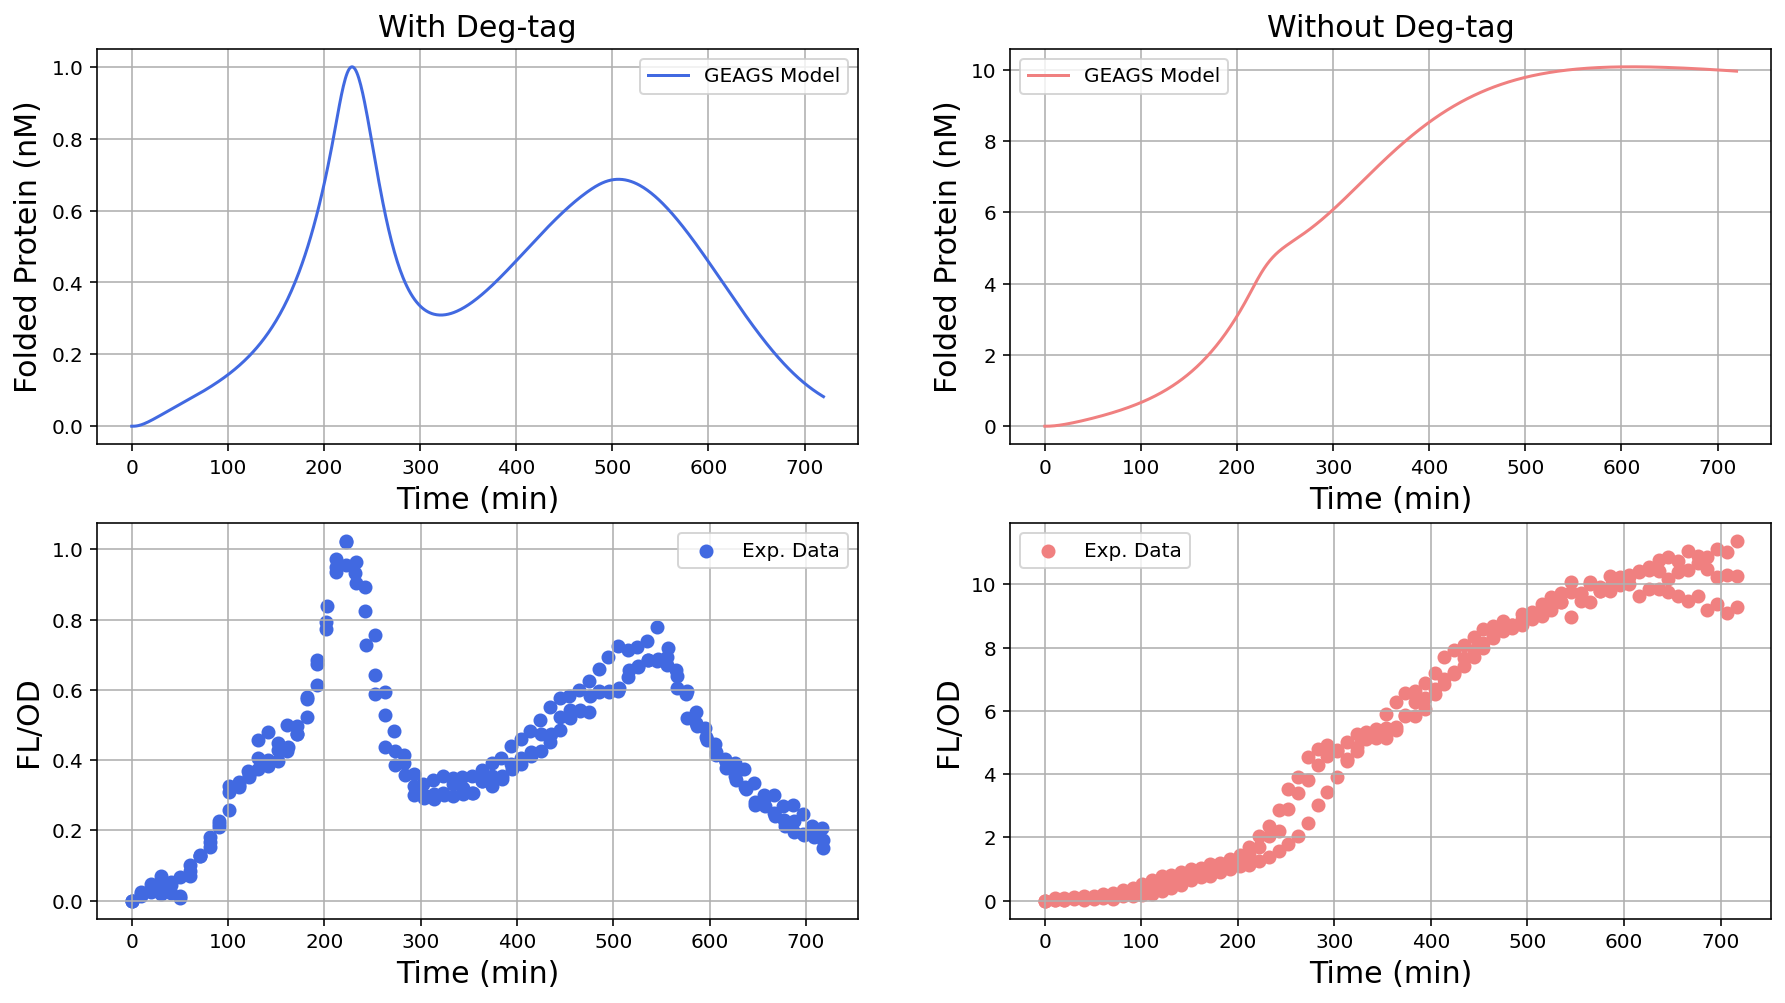

In [96]:
fig, ax = plt.subplots(2,2, figsize = (15,8))
fig.subplots_adjust(wspace = 0.2)#, hspace = 0.1)

last_ind = -1
r,c = 0,0
ax[r,c].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), label = "GEAGS Model", color = 'royalblue')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[r,c].set_title('With Deg-tag', fontsize = 15) ; ax[r,c].grid(True) ; ax[r,c].legend()

r,c = 0,1
ax[r,c].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), label = "GEAGS Model", color = 'lightcoral')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Folded Protein (nM)', fontsize = 15) 
ax[r,c].set_title('Without Deg-tag', fontsize = 15) ; ax[r,c].grid(True) ; ax[r,c].legend()

r,c = 1,0
ax[r,c].scatter(time_A[0][:tf_i], A_non_leaky[0][:tf_i]/A_max, color = 'royalblue', label = 'Exp. Data')
ax[r,c].scatter(time_A[1][:tf_i], A_non_leaky[1][:tf_i]/A_max, color = 'royalblue')
ax[r,c].scatter(time_A[2][:tf_i], A_non_leaky[2][:tf_i]/A_max, color = 'royalblue')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('FL/OD', fontsize = 15) ; ax[r,c].legend()
#ax[r,c].set_title('With Deg-tag') ; 
ax[r,c].grid(True)

r,c = 1,1
ax[r,c].scatter(time_B[0][:tf_i], B_non_leaky[0][:tf_i]/A_max, color = 'lightcoral', label = 'Exp. Data')
ax[r,c].scatter(time_B[1][:tf_i], B_non_leaky[1][:tf_i]/A_max, color = 'lightcoral')
ax[r,c].scatter(time_B[2][:tf_i], B_non_leaky[2][:tf_i]/A_max, color = 'lightcoral')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('FL/OD', fontsize = 15) ; ax[r,c].legend()
#ax[r,c].set_title('Without Deg-tag') ; 
ax[r,c].grid(True)

(0.0, 726.6666666666667)

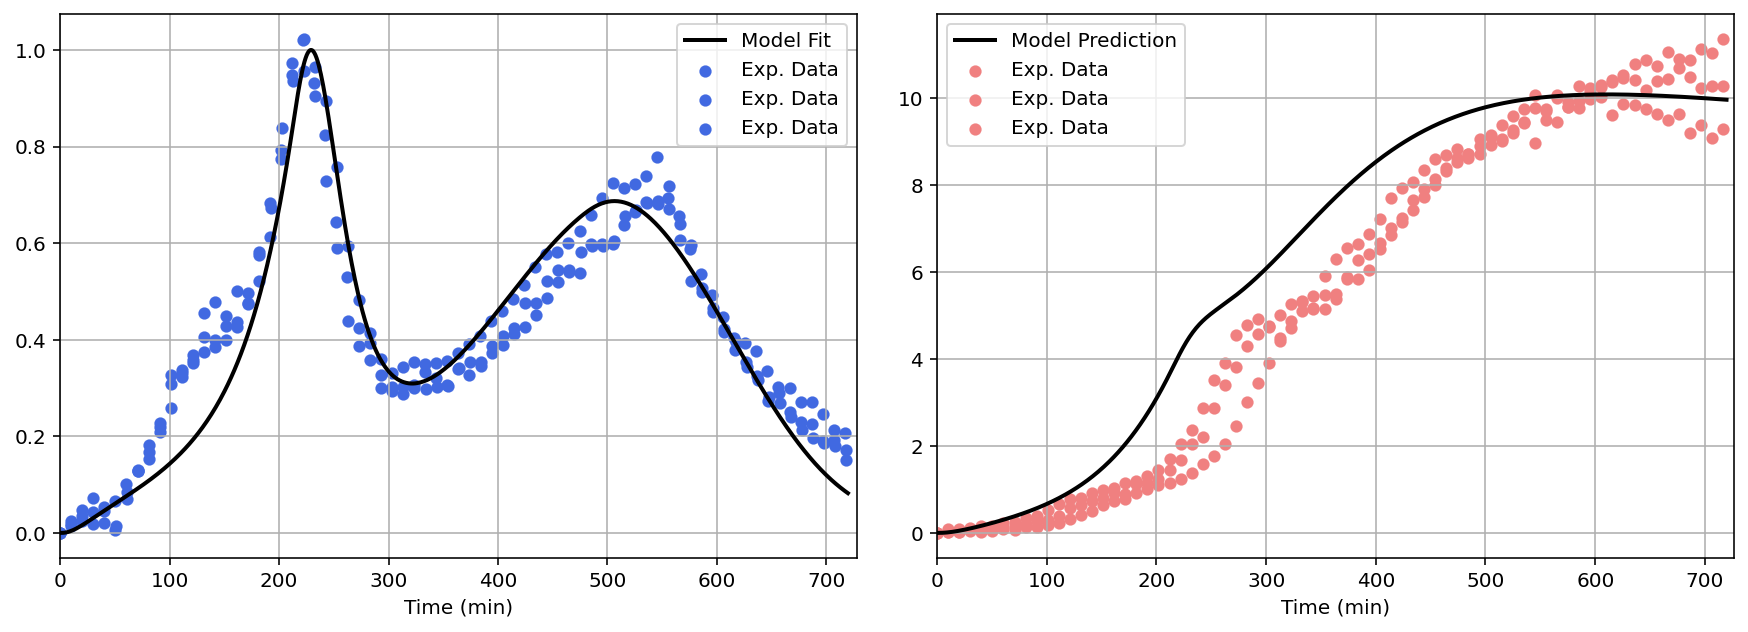

In [97]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.subplots_adjust(wspace = 0.1)#, hspace = 0.1)
#fig, ax = plt.subplots(2,1, figsize = (8,12))

linewidth = 2
scat = 0.1

ax[0].plot(timepoints[:tf_I], sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '-', linewidth = linewidth, label = "Model Fit", color = 'black')
#ax[0].fill_between(time_A[0][:tf_i], conf_int_deg_neg[:tf_i]/np.max(A_non_leaky[2]), conf_int_deg_pos[:tf_i]/np.max(A_non_leaky[2]), color='blue', alpha=0.2)
ax[0].scatter(time_A[0][:tf_i], A_non_leaky[0][:tf_i]/A_max, color = 'royalblue', label = 'Exp. Data', linewidth = scat)
ax[0].scatter(time_A[1][:tf_i], A_non_leaky[1][:tf_i]/A_max, color = 'royalblue', label = 'Exp. Data', linewidth = scat)
ax[0].scatter(time_A[2][:tf_i], A_non_leaky[2][:tf_i]/A_max, color = 'royalblue', label = 'Exp. Data', linewidth = scat)
ax[0].set_xlabel('Time (min)'); ax[0].grid(True) ; ax[0].legend() ; ax[0].set_xlim([0, time_A[0][tf_i]])

ax[1].plot(timepoints[:tf_I], sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X']), '-', linewidth = linewidth, label = "Model Prediction", color = 'black')
#ax[1].fill_between(time_A[0][:tf_i], conf_int_no_deg_neg[:tf_i]/np.max(A_non_leaky[2]), conf_int_no_deg_pos[:tf_i]/np.max(A_non_leaky[2]), color='blue', alpha=0.2)
ax[1].scatter(time_B[0][:tf_i], B_non_leaky[0][:tf_i]/A_max, color = 'lightcoral', label = 'Exp. Data', linewidth = scat)
ax[1].scatter(time_B[1][:tf_i], B_non_leaky[1][:tf_i]/A_max, color = 'lightcoral', label = 'Exp. Data', linewidth = scat)
ax[1].scatter(time_B[2][:tf_i], B_non_leaky[2][:tf_i]/A_max, color = 'lightcoral', label = 'Exp. Data', linewidth = scat)
ax[1].set_xlabel('Time (min)'); ax[1].grid(True) ; ax[1].legend(); ax[1].set_xlim([0, time_B[0][tf_i]])

#fig.savefig("GEAGS_qualitative_comparison.png")

In [120]:
# ## Exporting the scaled model prediction along with scaled experimental data

# GEAGS_model = dict()
# GEAGS_exp = dict()

# # Deg-tagged protein prediction 

# GEAGS_model['Scaled_deg_tag_protein'] = sol_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X'])
# GEAGS_exp['A1'] = A_non_leaky[0][:tf_i].reshape(-1)/A_max
# GEAGS_exp['A2'] = A_non_leaky[1][:tf_i].reshape(-1)/A_max
# GEAGS_exp['A3'] = A_non_leaky[2][:tf_i].reshape(-1)/A_max

# # Non Deg-tagged protein prediction 

# GEAGS_model['Scaled_no_deg_tag_protein'] = sol_no_deg['protein_X'][:tf_I]/np.max(sol_deg['protein_X'])
# GEAGS_exp['B1'] = B_non_leaky[0][:tf_i].reshape(-1)/A_max
# GEAGS_exp['B2'] = B_non_leaky[1][:tf_i].reshape(-1)/A_max
# GEAGS_exp['B3'] = B_non_leaky[2][:tf_i].reshape(-1)/A_max

# GEAGS_model['Time_model'] = timepoints[:tf_I]
# GEAGS_exp['Time_exp'] = time_A[0][:tf_i].reshape(-1)


# GEAGS_model_df = pd.DataFrame(data = GEAGS_model)
# GEAGS_model_df.to_csv('simulation_scaled_data.csv')

# GEAGS_exp_df = pd.DataFrame(data = GEAGS_exp)
# GEAGS_exp_df.to_csv('expt_scaled_data.csv')


Text(0.5, 1.0, ' Comparison of the absolute values of two profiles in initial time period')

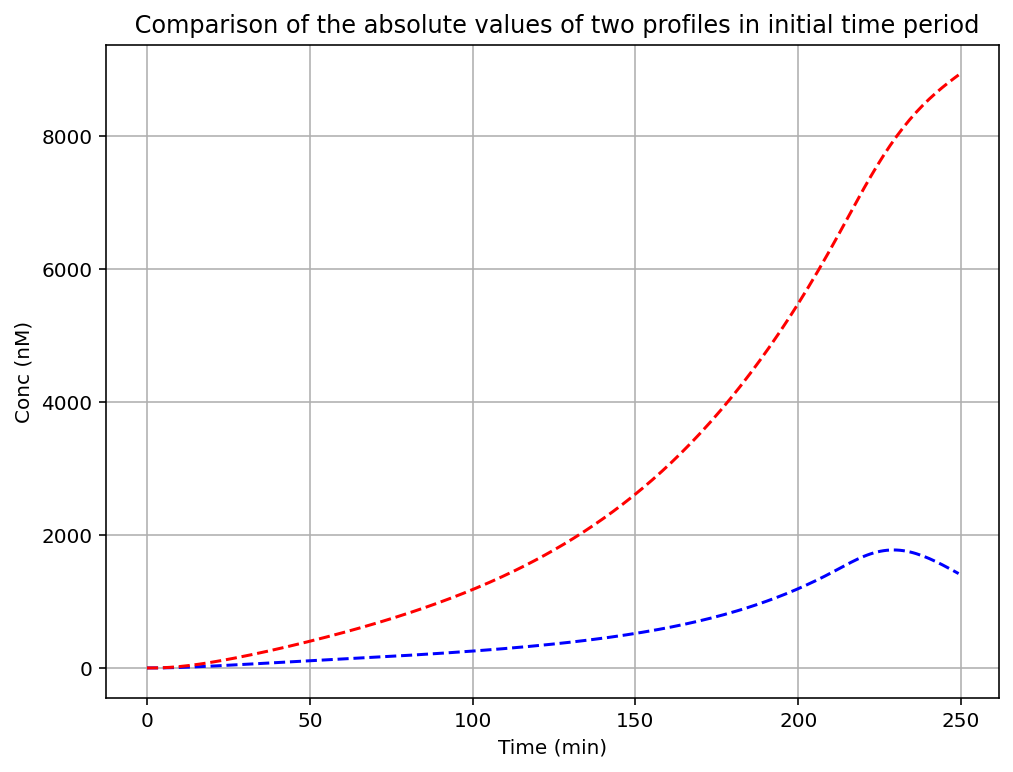

In [99]:
fig, ax = plt.subplots(1,1, figsize = (8,6))

last_time = 250

ax.plot(timepoints[:last_time], sol_deg['protein_X'][:last_time], '--', label = "Model Fit", color = 'blue')
ax.plot(timepoints[:last_time], sol_no_deg['protein_X'][:last_time], '--', label = "Model Fit", color = 'red')
ax.set_xlabel('Time (min)') ; ax.set_ylabel('Conc (nM)') ; ax.grid(True)
ax.set_title(' Comparison of the absolute values of two profiles in initial time period')

In [100]:
# The fold change between protein from the model comparison
np.max(sol_no_deg['protein_X'])/np.max(sol_deg['protein_X'])

10.079504336069128

In [101]:
## Command to export the complete simulation run data

# sol_deg_run_data = pd.DataFrame(sol_deg)
# sol_deg_run_data.to_csv('GEAGS_sol_deg_run_data_062724.csv')

# sol_no_deg_run_data = pd.DataFrame(sol_no_deg)
# sol_no_deg_run_data.to_csv('GEAGS_sol_no_deg_run_data_062724.csv')

### With deg-tag

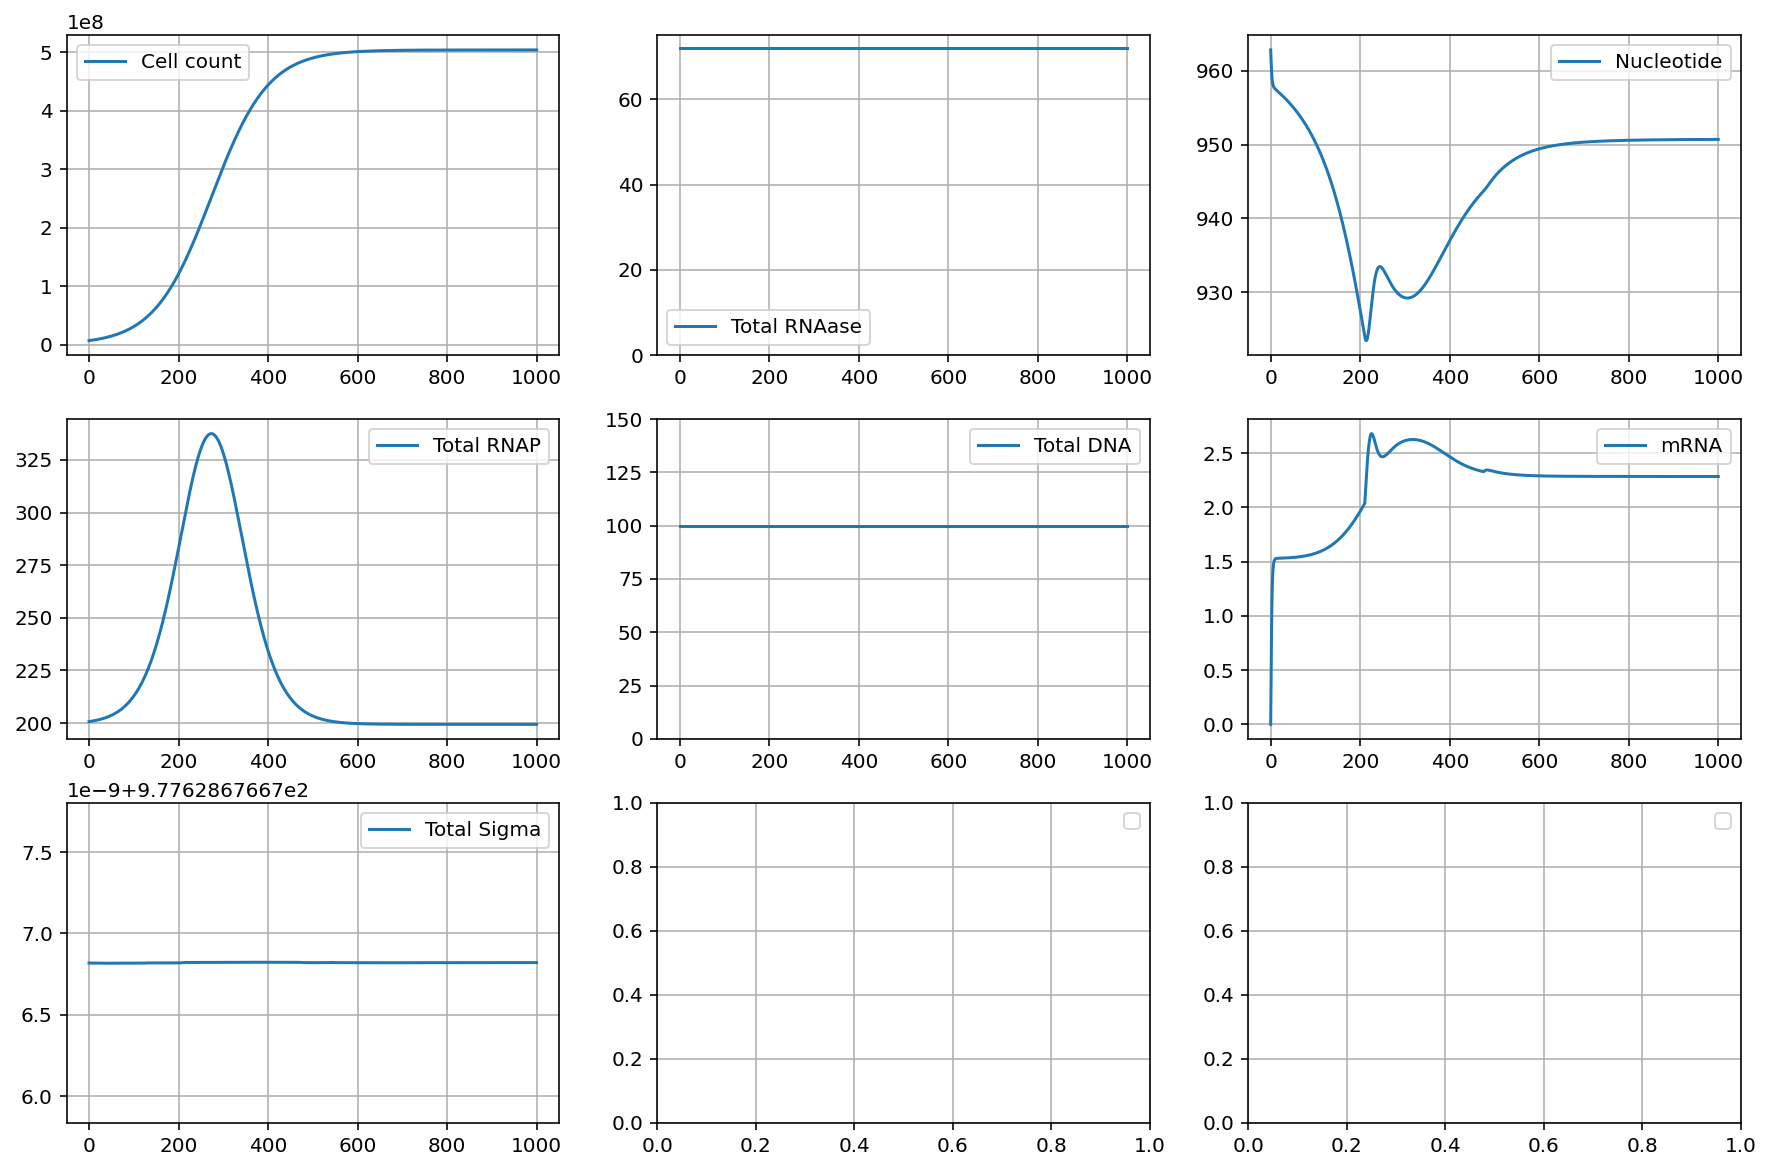

In [102]:
# Total rnap, bound and unbound
RNAP_total = np.zeros(len(timepoints))
RNAP_total[:] = sol_deg['protein_RNAP_machinery'][:] + sol_deg['complex_protein_RNAP_machinery_protein_sigma_machinery_'][:]  
RNAP_total[:] += sol_deg['complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_'][:] 



# Total DNA, bound and unbound
DNA_total = np.zeros(len(timepoints))
DNA_total[:] = sol_deg['dna_X'][:] + sol_deg['complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_'][:]

# Total sigma, bound and unbound
sigma_total = np.zeros(len(timepoints))
sigma_total[:] = sol_deg['protein_sigma_machinery'][:] + sol_deg['complex_protein_RNAP_machinery_protein_sigma_machinery_'][:] 
sigma_total[:] += sol_deg['complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_'][:] 

# Total RNAase, bound and unbound
rnaase_total = np.zeros(len(timepoints))
rnaase_total[:] = sol_deg['protein_RNAase_machinery'][:] + sol_deg['complex_protein_RNAase_machinery_rna_T_X_'][:]

fig,ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
ax[0][0].plot(timepoints, sol_deg['cell_count_count'], label = "Cell count")
ax[0][1].plot(timepoints, rnaase_total, label = "Total RNAase");ax[0][1].set_ylim(bottom = 0, top = 75)
ax[0][2].plot(timepoints, sol_deg['protein_NT_units'], label = "Nucleotide")
ax[1][0].plot(timepoints, RNAP_total, label = "Total RNAP")
ax[1][1].plot(timepoints, DNA_total, label = "Total DNA");ax[1][1].set_ylim(bottom = 0, top = 150)
ax[1][2].plot(timepoints, sol_deg['rna_T_X'], label = "mRNA")
ax[2][0].plot(timepoints, sigma_total, label = "Total Sigma"); #ax[2][0].set_ylim(bottom = 0, top = 1500)


ax[0][0].legend() ; ax[0][0].grid(); 
ax[0][1].legend() ; ax[0][1].grid(); 
ax[0][2].legend() ; ax[0][2].grid(); 
ax[2][0].legend() ; ax[1][0].grid(); 
ax[1][0].legend() ; ax[1][1].grid(); 
ax[1][1].legend() ; ax[1][2].grid(); 
ax[1][2].legend() ; ax[2][0].grid(); 
ax[2][1].legend() ; ax[2][1].grid(); 
ax[2][2].legend() ; ax[2][2].grid(); 

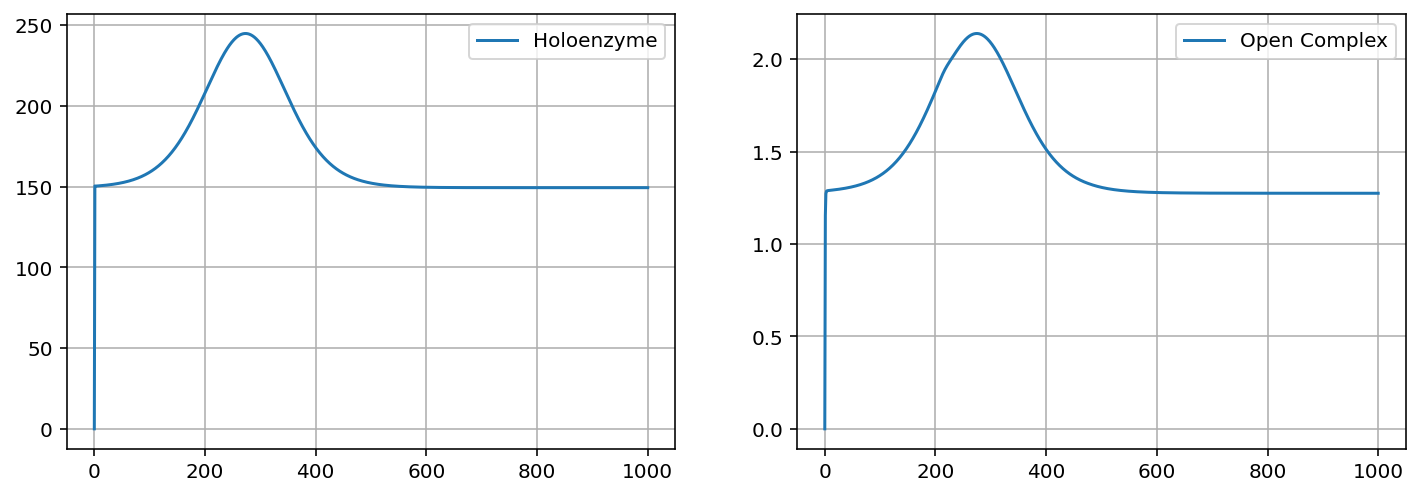

In [103]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

ax[0].plot(timepoints, sol_deg['complex_protein_RNAP_machinery_protein_sigma_machinery_'], label = 'Holoenzyme')
ax[1].plot(timepoints, sol_deg['complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_'] , label = 'Open Complex')
ax[0].legend(); ax[1].legend(); 
ax[0].grid(); ax[1].grid(); 

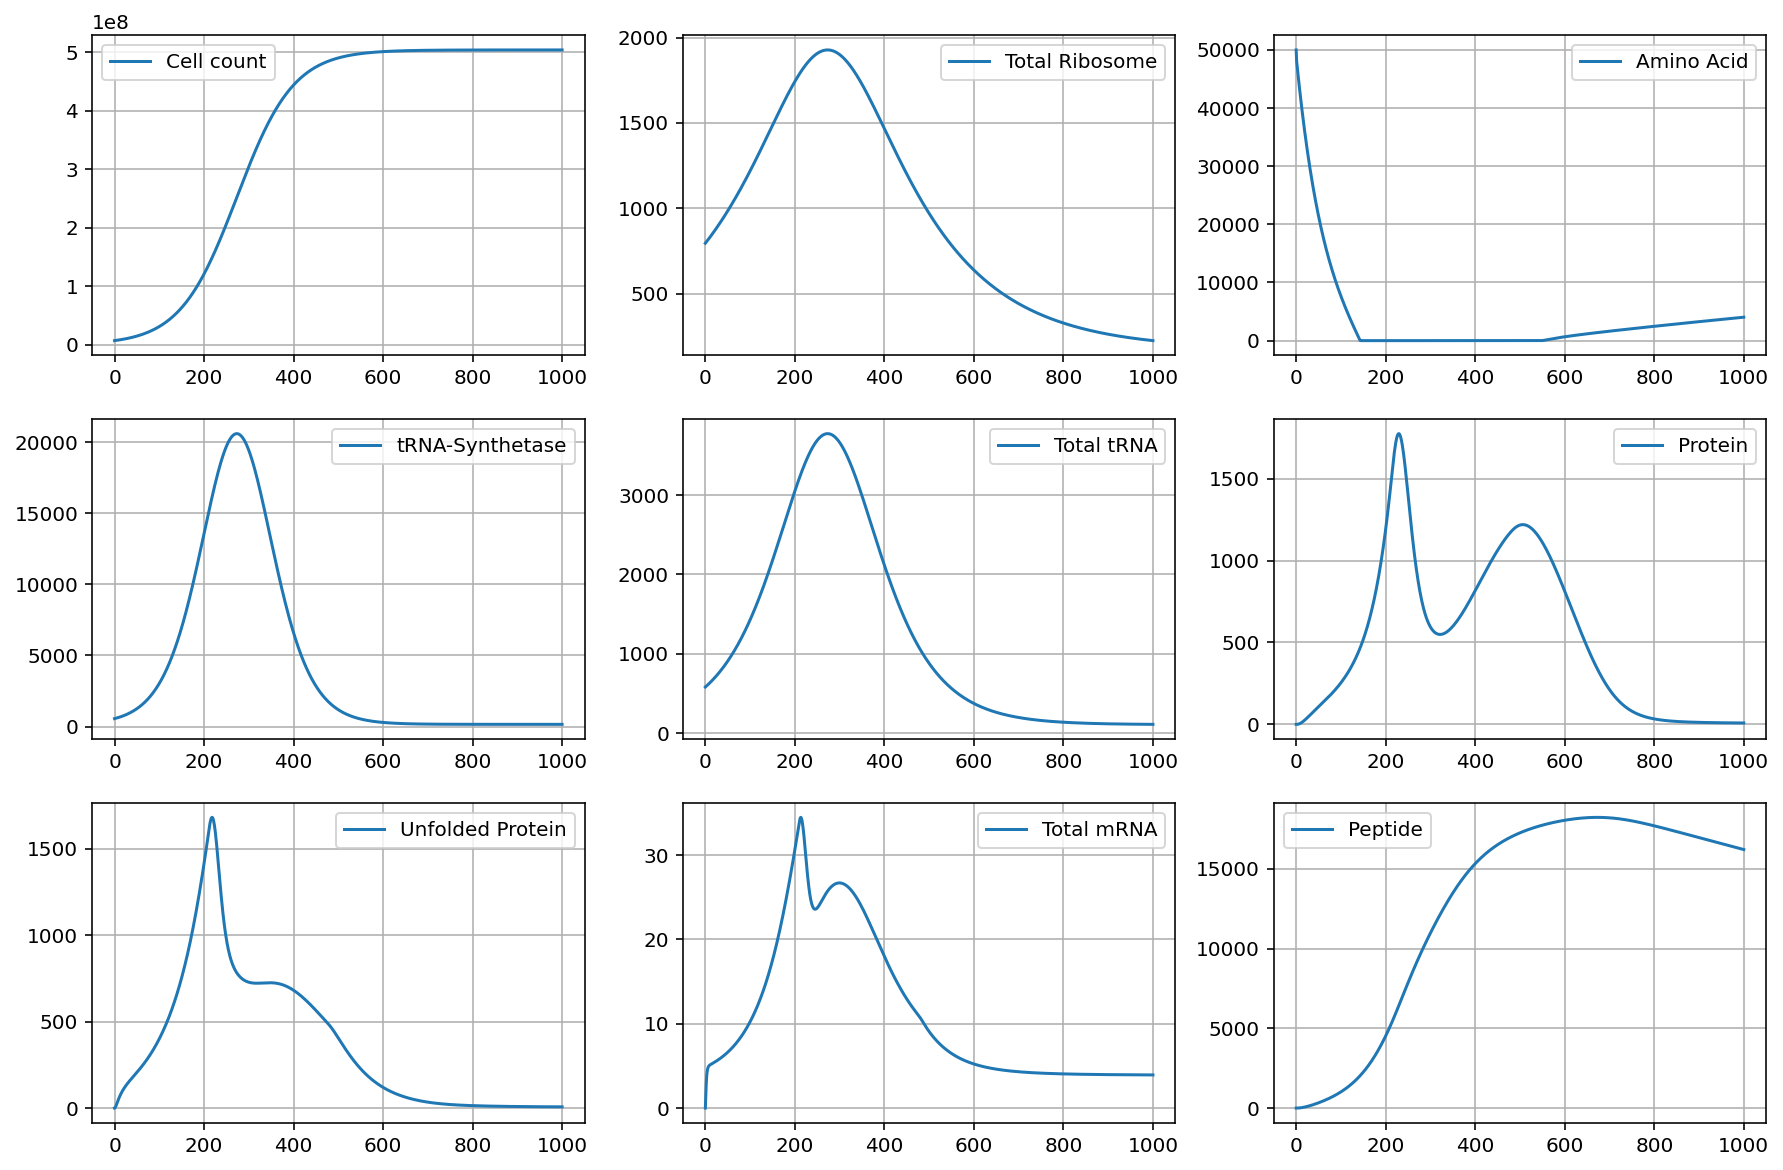

In [104]:
# Total Ribosome, bound and unbound
ribo_total = np.zeros(len(timepoints))
ribo_total[:] = sol_deg['protein_Ribo_machinery'][:]
ribo_total[:] += sol_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'][:]

# Total tRNA, bound and unbound
tRNA_total = np.zeros(len(timepoints))
tRNA_total[:] = sol_deg['protein_tRNA_machinery'][:] + sol_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_inactive_'][:]
tRNA_total[:] += sol_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_active_'][:]
tRNA_total[:] += sol_deg['complex_protein_AA_units0tl_protein_tRNA_machinery_'][:]
tRNA_total[:] += sol_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'][:]

# Total mRNA, bound and unbound
mrna_total = np.zeros(len(timepoints))
mrna_total[:] = sol_deg['rna_T_X'][:]
mrna_total[:] += sol_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'][:]
mrna_total[:] += sol_deg['complex_protein_RNAase_machinery_rna_T_X_'][:]


# Total tRNA synthetase
synth_total = np.zeros(len(timepoints))
synth_total[:] = sol_deg['protein_Et_machinery'][:]
synth_total[:] += sol_deg['complex_protein_AA_units0tl_protein_Et_machinery_'][:]
synth_total[:] += sol_deg['complex_protein_AA_units0tl_protein_Et_machinery_amp_'][:]
synth_total[:] += sol_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_inactive_'][:]
synth_total[:] += sol_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_active_'][:]


# Total Amino Acid 
aa_total = np.zeros(len(timepoints))
aa_total[:] = sol_deg['protein_AA_units0tl'][:]
aa_total[:] += sol_deg['complex_protein_AA_units0tl_protein_Et_machinery_'][:]
aa_total[:] += sol_deg['complex_protein_AA_units0tl_protein_Et_machinery_amp_'][:]
aa_total[:] += sol_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_inactive_'][:]
aa_total[:] += sol_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_active_'][:]
aa_total[:] += sol_deg['complex_protein_AA_units0tl_protein_tRNA_machinery_'][:]
aa_total[:] += sol_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'][:]

fig,ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
# ax.set_title("Growth dependent gene expression")

ax[0][0].plot(timepoints, sol_deg['cell_count_count'], label = "Cell count")
ax[0][1].plot(timepoints, ribo_total, label = "Total Ribosome")
ax[0][2].plot(timepoints, sol_deg['protein_AA_units0tl'] , label = "Amino Acid")
ax[1][0].plot(timepoints, synth_total, label = "tRNA-Synthetase")
ax[1][1].plot(timepoints, tRNA_total, label = "Total tRNA")
ax[1][2].plot(timepoints, sol_deg['protein_X'], label = "Protein")
ax[2][0].plot(timepoints, sol_deg['protein_unfolded_protein_degtag'], label = "Unfolded Protein")
ax[2][1].plot(timepoints, mrna_total, label = "Total mRNA")
ax[2][2].plot(timepoints, sol_deg['protein_peptide_chain_peptide'], label = "Peptide")


ax[0][0].legend() ; ax[0][0].grid(); 
ax[0][1].legend() ; ax[0][1].grid(); 
ax[0][2].legend() ; ax[0][2].grid(); 
ax[2][0].legend() ; ax[1][0].grid(); 
ax[1][0].legend() ; ax[1][1].grid(); 
ax[1][1].legend() ; ax[1][2].grid(); 
ax[1][2].legend() ; ax[2][0].grid(); 
ax[2][1].legend() ; ax[2][1].grid(); 
ax[2][2].legend() ; ax[2][2].grid(); 


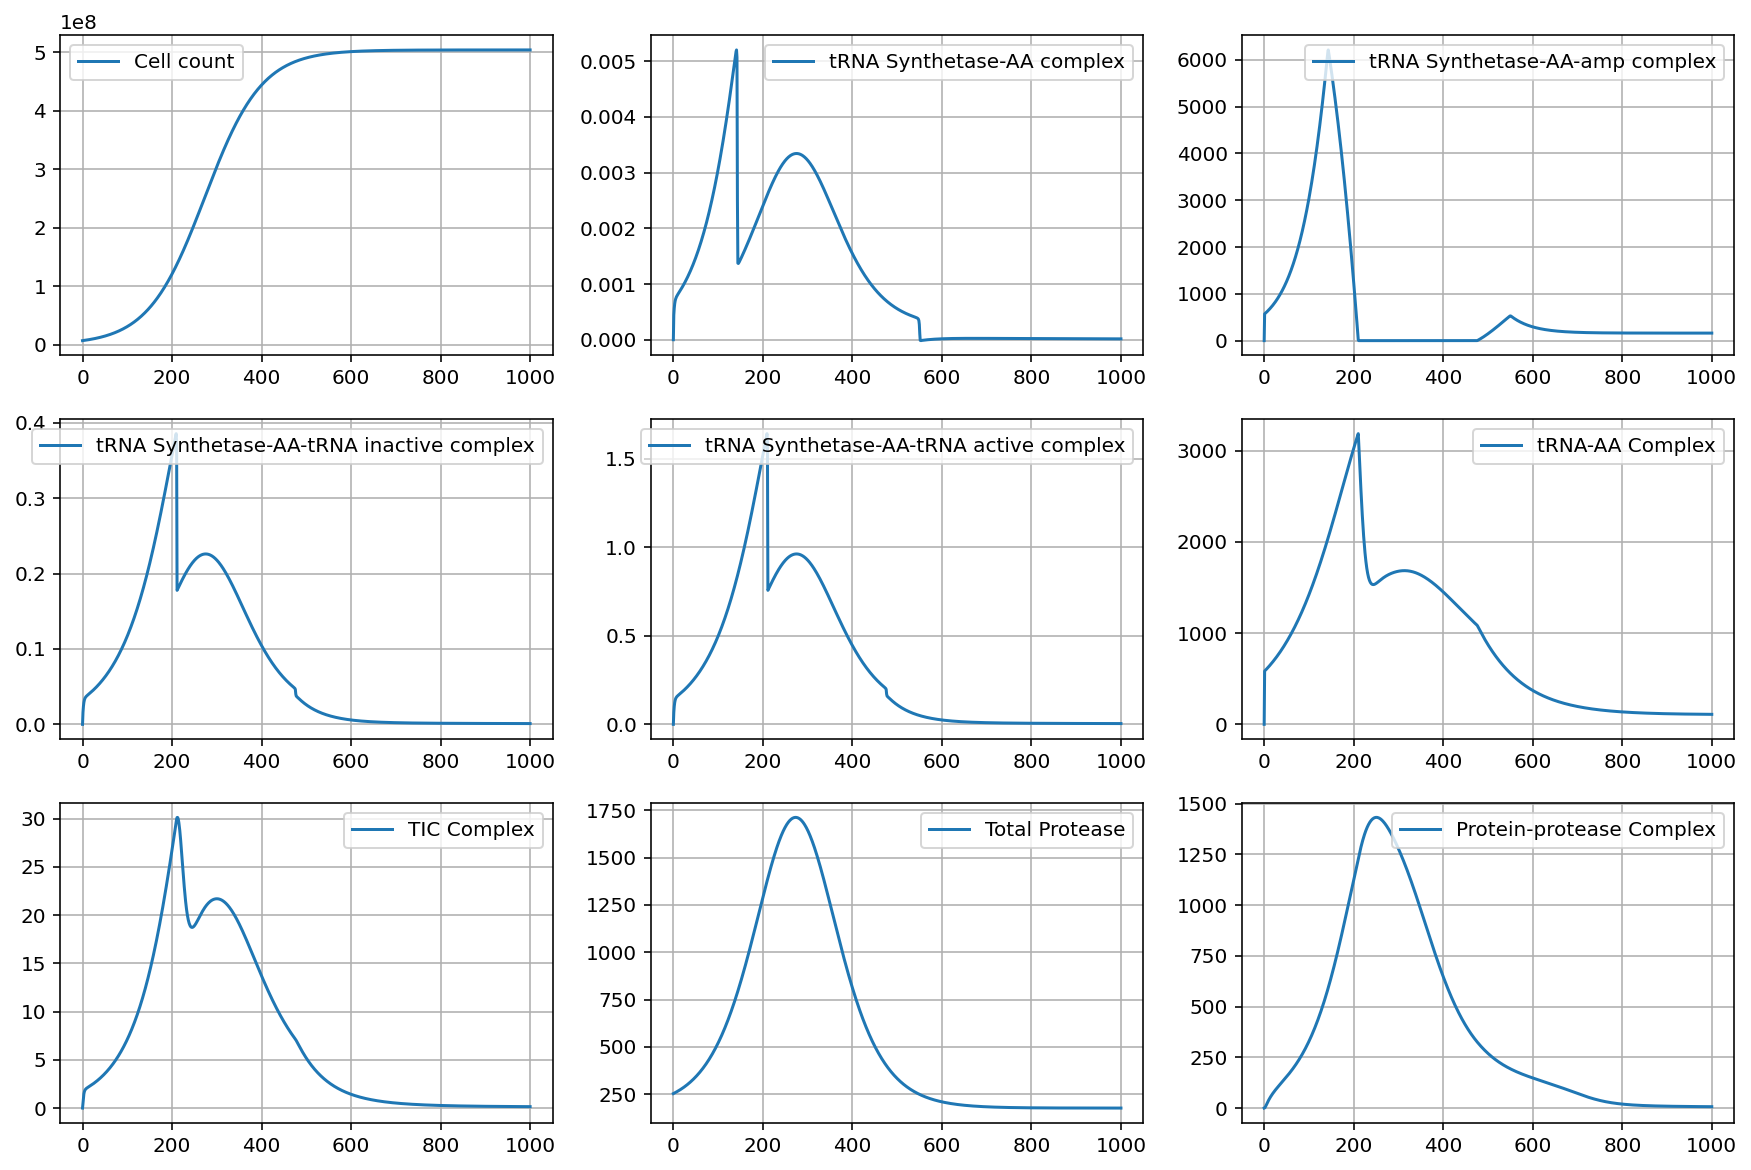

In [105]:
fig,ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
# ax.set_title("Growth dependent gene expression")

protease_total = np.zeros(len(timepoints))
protease_total[:] = sol_deg['protein_protease_machinery'][:]
protease_total[:] += sol_deg['complex_protein_protease_machinery_protein_unfolded_protein_degtag_'][:]
protease_total[:] += sol_deg['complex_protein_X_protein_protease_machinery_'][:]

deg_complex = np.zeros(len(timepoints))
deg_complex[:] = sol_deg['complex_protein_protease_machinery_protein_unfolded_protein_degtag_'][:]
deg_complex[:] += sol_deg['complex_protein_X_protein_protease_machinery_'][:]



ax[0][0].plot(timepoints, sol_deg['cell_count_count'], label = "Cell count")
ax[0][1].plot(timepoints, sol_deg['complex_protein_AA_units0tl_protein_Et_machinery_'], label = "tRNA Synthetase-AA complex")
ax[0][2].plot(timepoints, sol_deg['complex_protein_AA_units0tl_protein_Et_machinery_amp_'], label = "tRNA Synthetase-AA-amp complex")
ax[1][0].plot(timepoints, sol_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_inactive_'],
label = "tRNA Synthetase-AA-tRNA inactive complex")
ax[1][1].plot(timepoints, sol_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_active_'],
label = "tRNA Synthetase-AA-tRNA active complex")
ax[1][2].plot(timepoints, sol_deg['complex_protein_AA_units0tl_protein_tRNA_machinery_'], label = "tRNA-AA Complex")
ax[2][0].plot(timepoints,sol_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'],
label = "TIC Complex")
ax[2][1].plot(timepoints, protease_total, label = "Total Protease")
ax[2][2].plot(timepoints, deg_complex, label = "Protein-protease Complex")



ax[0][0].legend() ; ax[0][0].grid(); 
ax[0][1].legend() ; ax[0][1].grid(); 
ax[0][2].legend() ; ax[0][2].grid(); 
ax[2][0].legend() ; ax[1][0].grid(); 
ax[1][0].legend() ; ax[1][1].grid(); 
ax[1][1].legend() ; ax[1][2].grid(); 
ax[1][2].legend() ; ax[2][0].grid(); 
ax[2][1].legend() ; ax[2][1].grid(); 
ax[2][2].legend() ; ax[2][2].grid(); 


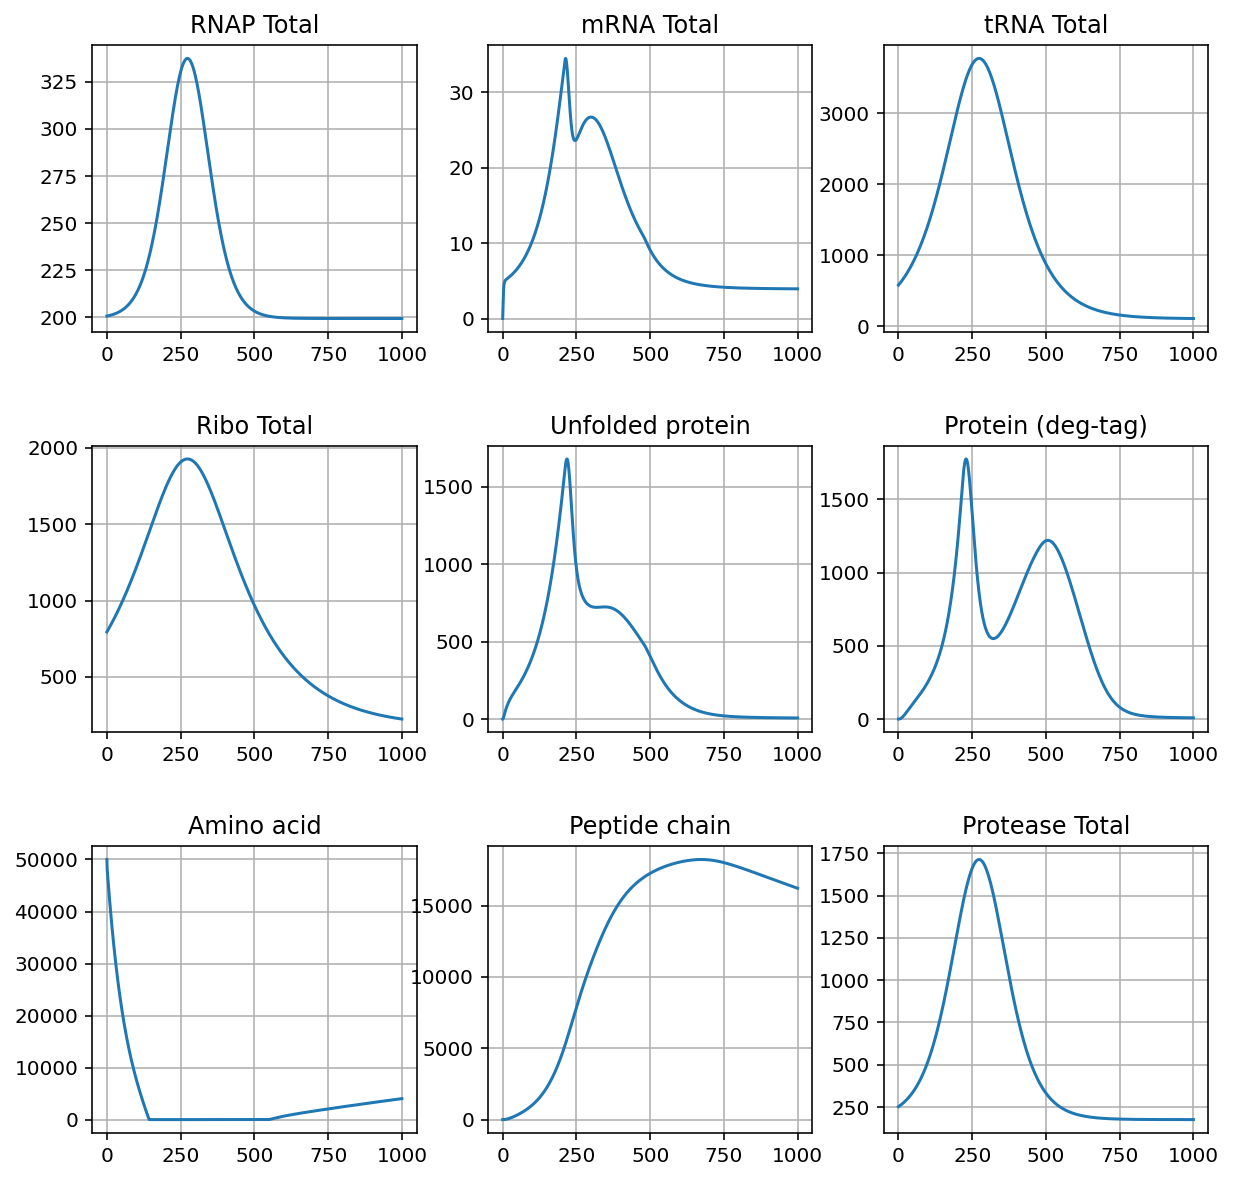

In [106]:
## Plotting selected species 

fig, ax = plt.subplots(3,3, figsize = (10,10))
fig.subplots_adjust(wspace = 0.22, hspace = 0.4)

r,c = 0,0
ax[r,c].plot(timepoints, RNAP_total)
ax[r,c].set_title('RNAP Total')
ax[r,c].grid(True)

r,c = 0,1
ax[r,c].plot(timepoints, mrna_total)
ax[r,c].set_title('mRNA Total')
ax[r,c].grid(True)

r,c = 0,2
ax[r,c].plot(timepoints, tRNA_total)
ax[r,c].set_title('tRNA Total')
ax[r,c].grid(True)

r,c = 1,0
ax[r,c].plot(timepoints, ribo_total)
ax[r,c].set_title('Ribo Total')
ax[r,c].grid(True)

r,c = 1,1
ax[r,c].plot(timepoints, sol_deg['protein_unfolded_protein_degtag'])
ax[r,c].set_title('Unfolded protein')
ax[r,c].grid(True)

r,c = 1,2
ax[r,c].plot(timepoints, sol_deg['protein_X'])
ax[r,c].set_title('Protein (deg-tag)')
ax[r,c].grid(True)

r,c = 2,0
ax[r,c].plot(timepoints[:], sol_deg['protein_AA_units0tl'][:])
# axins = inset_axes(ax[r,c], width = '40%', height = '40%', loc = 'upper right') # zoom = 6
# axins.plot(timepoints[150:600], sol_deg['protein_AA_units0tl'][150:600])
# mark_inset(ax[r,c], axins, loc1 = 2, loc2 = 4, fc = "none", ec = "0.5")
ax[r,c].set_title('Amino acid')
ax[r,c].grid(True)

r,c = 2,1
ax[r,c].plot(timepoints, sol_deg['protein_peptide_chain_peptide'])
ax[r,c].set_title('Peptide chain')
ax[r,c].grid(True)

r,c = 2,2
# ax[r,c].plot(timepoints, sol_deg['cell_count_count'])
ax[r,c].plot(timepoints, protease_total)
ax[r,c].set_title('Protease Total')
ax[r,c].grid(True)

In [107]:
# ## Exporting the data for plotting the results in datagraph (first 720 minutes only) 

# GEAGS_run_data_720min_deg_tag = dict()

# # Transcription related  species 
# GEAGS_run_data_720min_deg_tag['RNAP_total'] = RNAP_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['Sigma_total'] = sigma_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['DNA_total'] =  DNA_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['Nucleotide'] = sol_deg['protein_NT_units'][:tf_I]
# GEAGS_run_data_720min_deg_tag['mRNA_total'] = mrna_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['RNAase_total'] = rnaase_total[:tf_I]

# # Translation related  species 
# GEAGS_run_data_720min_deg_tag['Ribosome_total'] = ribo_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['tRNA_total'] = tRNA_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['tRNA_synthetase_total'] = synth_total[:tf_I]
# GEAGS_run_data_720min_deg_tag['Unfolded_protein'] = sol_deg['protein_unfolded_protein_degtag'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Folded_protein'] = sol_deg['protein_X'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Peptide_chain'] = sol_deg['protein_peptide_chain_peptide'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Amino_acid'] = sol_deg['protein_AA_units0tl'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Protease_total'] = protease_total[:tf_I]

# # Transcription itermediate complexes
# GEAGS_run_data_720min_deg_tag['Holoenzyme'] = sol_deg['complex_protein_RNAP_machinery_protein_sigma_machinery_'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Open_promoter_complex'] = sol_deg['complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_'][:tf_I]
# GEAGS_run_data_720min_deg_tag['mRNA_RNAase_complex'] = sol_deg['complex_protein_RNAase_machinery_rna_T_X_'][:tf_I]

# # Translation itermediate complexes
# GEAGS_run_data_720min_deg_tag['Et_AA_complex'] = sol_deg['complex_protein_AA_units0tl_protein_Et_machinery_'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Et_AA_amp_complex'] = sol_deg['complex_protein_AA_units0tl_protein_Et_machinery_amp_'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Et_AA_tRNA_inactive_complex'] = sol_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_inactive_'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Et_AA_tRNA_active_complex'] = sol_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_active_'][:tf_I]
# GEAGS_run_data_720min_deg_tag['tRNA_AA_complex'] = sol_deg['complex_protein_AA_units0tl_protein_tRNA_machinery_'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Translation_initiation_complex'] = sol_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'][:tf_I]
# GEAGS_run_data_720min_deg_tag['Protease_protein_complex'] = deg_complex[:tf_I]

# GEAGS_run_data_720min_deg_tag['Time'] = timepoints[:tf_I]

# GEAGS_run_data_720min_deg_tag_df = pd.DataFrame(data = GEAGS_run_data_720min_deg_tag)
# GEAGS_run_data_720min_deg_tag_df.to_csv('simulation_data_720min_deg_tag.csv')


### Without deg-tag

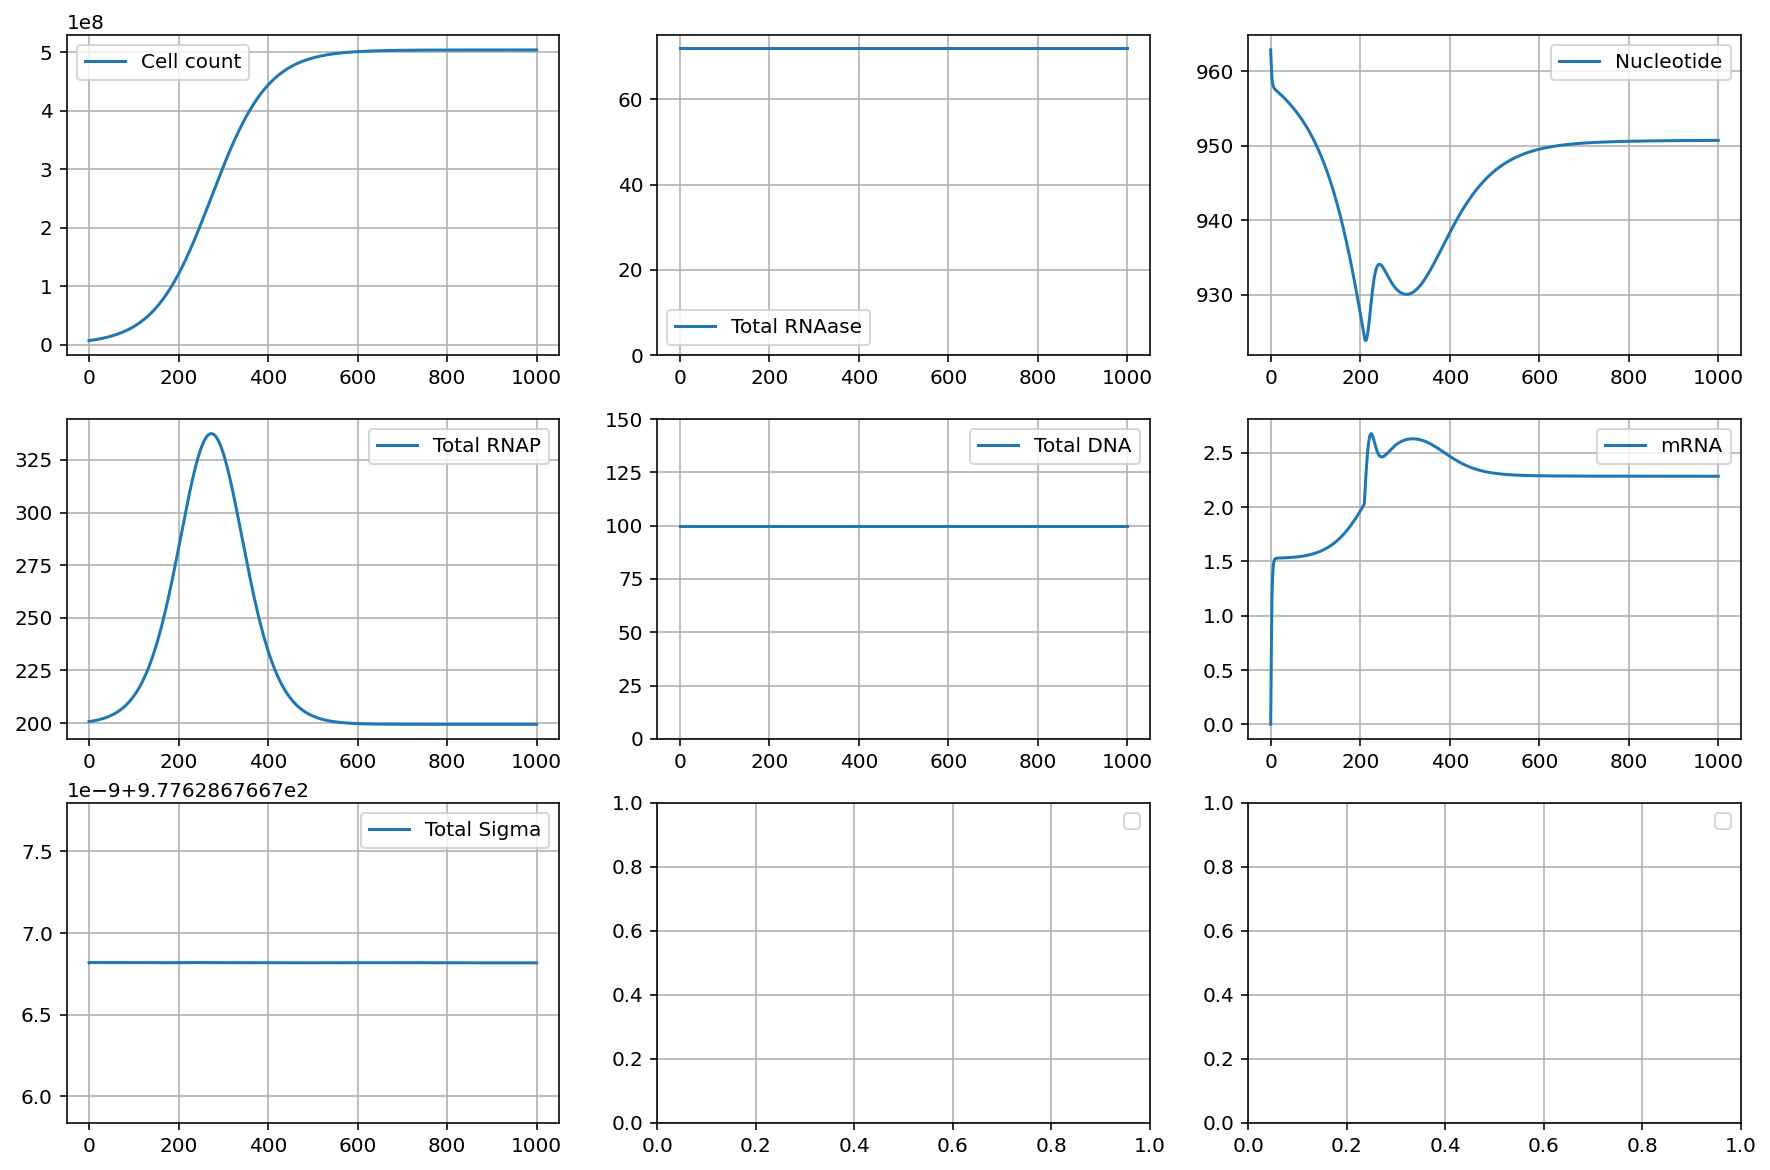

In [108]:
# Total rnap, bound and unbound
RNAP_total = np.zeros(len(timepoints))
RNAP_total[:] = sol_no_deg['protein_RNAP_machinery'][:] + sol_no_deg['complex_protein_RNAP_machinery_protein_sigma_machinery_'][:]  
RNAP_total[:] += sol_no_deg['complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_'][:] 



# Total DNA, bound and unbound
DNA_total = np.zeros(len(timepoints))
DNA_total[:] = sol_no_deg['dna_X'][:] + sol_no_deg['complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_'][:]

# Total sigma, bound and unbound
sigma_total = np.zeros(len(timepoints))
sigma_total[:] = sol_no_deg['protein_sigma_machinery'][:] + sol_no_deg['complex_protein_RNAP_machinery_protein_sigma_machinery_'][:] 
sigma_total[:] += sol_no_deg['complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_'][:] 

# Total RNAase, bound and unbound
rnaase_total = np.zeros(len(timepoints))
rnaase_total[:] = sol_no_deg['protein_RNAase_machinery'][:] + sol_no_deg['complex_protein_RNAase_machinery_rna_T_X_'][:]

fig,ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
ax[0][0].plot(timepoints, sol_no_deg['cell_count_count'], label = "Cell count")
ax[0][1].plot(timepoints, rnaase_total, label = "Total RNAase");ax[0][1].set_ylim(bottom = 0, top = 75)
ax[0][2].plot(timepoints, sol_no_deg['protein_NT_units'], label = "Nucleotide")
ax[1][0].plot(timepoints, RNAP_total, label = "Total RNAP")
ax[1][1].plot(timepoints, DNA_total, label = "Total DNA");ax[1][1].set_ylim(bottom = 0, top = 150)
ax[1][2].plot(timepoints, sol_no_deg['rna_T_X'], label = "mRNA")
ax[2][0].plot(timepoints, sigma_total, label = "Total Sigma"); #ax[2][0].set_ylim(bottom = 0, top = 1500)


ax[0][0].legend() ; ax[0][0].grid(); 
ax[0][1].legend() ; ax[0][1].grid(); 
ax[0][2].legend() ; ax[0][2].grid(); 
ax[2][0].legend() ; ax[1][0].grid(); 
ax[1][0].legend() ; ax[1][1].grid(); 
ax[1][1].legend() ; ax[1][2].grid(); 
ax[1][2].legend() ; ax[2][0].grid(); 
ax[2][1].legend() ; ax[2][1].grid(); 
ax[2][2].legend() ; ax[2][2].grid(); 

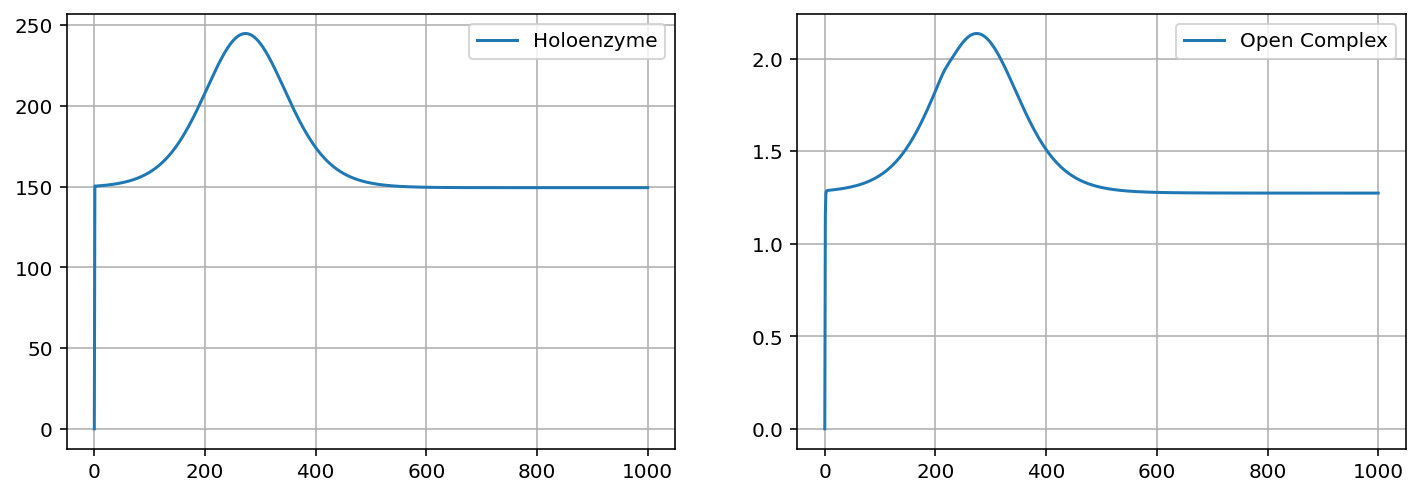

In [109]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))

ax[0].plot(timepoints, sol_no_deg['complex_protein_RNAP_machinery_protein_sigma_machinery_'], label = 'Holoenzyme')
ax[1].plot(timepoints, sol_no_deg['complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_'] , label = 'Open Complex')
ax[0].legend(); ax[1].legend(); 
ax[0].grid(); ax[1].grid(); 

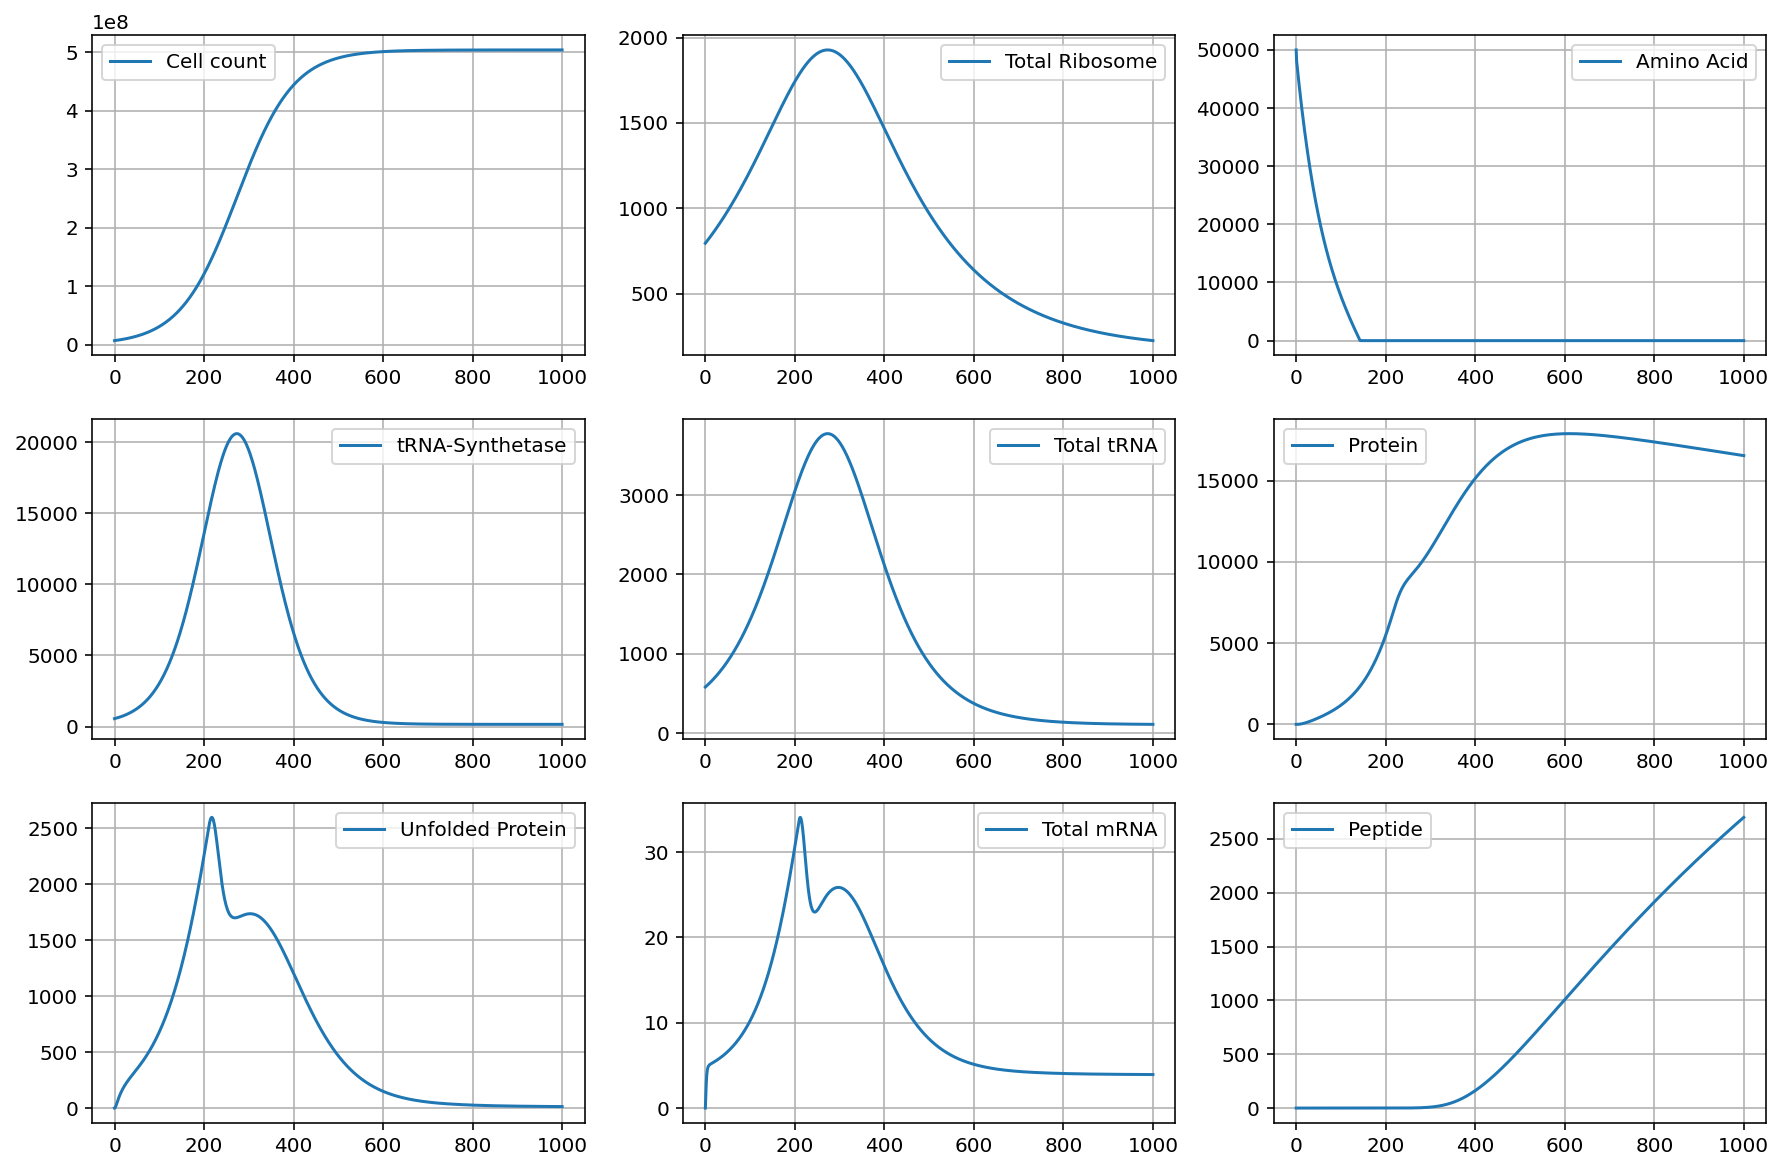

In [110]:
# Total Ribosome, bound and unbound
ribo_total = np.zeros(len(timepoints))
ribo_total[:] = sol_no_deg['protein_Ribo_machinery'][:]
ribo_total[:] += sol_no_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'][:]

# Total tRNA, bound and unbound
tRNA_total = np.zeros(len(timepoints))
tRNA_total[:] = sol_no_deg['protein_tRNA_machinery'][:] + sol_no_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_inactive_'][:]
tRNA_total[:] += sol_no_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_active_'][:]
tRNA_total[:] += sol_no_deg['complex_protein_AA_units0tl_protein_tRNA_machinery_'][:]
tRNA_total[:] += sol_no_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'][:]

# Total mRNA, bound and unbound
mrna_total = np.zeros(len(timepoints))
mrna_total[:] = sol_no_deg['rna_T_X'][:]
mrna_total[:] += sol_no_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'][:]
mrna_total[:] += sol_no_deg['complex_protein_RNAase_machinery_rna_T_X_'][:]


# Total tRNA synthetase
synth_total = np.zeros(len(timepoints))
synth_total[:] = sol_no_deg['protein_Et_machinery'][:]
synth_total[:] += sol_no_deg['complex_protein_AA_units0tl_protein_Et_machinery_'][:]
synth_total[:] += sol_no_deg['complex_protein_AA_units0tl_protein_Et_machinery_amp_'][:]
synth_total[:] += sol_no_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_inactive_'][:]
synth_total[:] += sol_no_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_active_'][:]


# Total Amino Acid 
aa_total = np.zeros(len(timepoints))
aa_total[:] = sol_no_deg['protein_AA_units0tl'][:]
aa_total[:] += sol_no_deg['complex_protein_AA_units0tl_protein_Et_machinery_'][:]
aa_total[:] += sol_no_deg['complex_protein_AA_units0tl_protein_Et_machinery_amp_'][:]
aa_total[:] += sol_no_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_inactive_'][:]
aa_total[:] += sol_no_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_active_'][:]
aa_total[:] += sol_no_deg['complex_protein_AA_units0tl_protein_tRNA_machinery_'][:]
aa_total[:] += sol_no_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'][:]

fig,ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
# ax.set_title("Growth dependent gene expression")

ax[0][0].plot(timepoints, sol_no_deg['cell_count_count'], label = "Cell count")
ax[0][1].plot(timepoints, ribo_total, label = "Total Ribosome")
ax[0][2].plot(timepoints, sol_no_deg['protein_AA_units0tl'] , label = "Amino Acid")
ax[1][0].plot(timepoints, synth_total, label = "tRNA-Synthetase")
ax[1][1].plot(timepoints, tRNA_total, label = "Total tRNA")
ax[1][2].plot(timepoints, sol_no_deg['protein_X'], label = "Protein")
ax[2][0].plot(timepoints, sol_no_deg['protein_unfolded_protein_degtag'], label = "Unfolded Protein")
ax[2][1].plot(timepoints, mrna_total, label = "Total mRNA")
ax[2][2].plot(timepoints, sol_no_deg['protein_peptide_chain_peptide'], label = "Peptide")


ax[0][0].legend() ; ax[0][0].grid(); 
ax[0][1].legend() ; ax[0][1].grid(); 
ax[0][2].legend() ; ax[0][2].grid(); 
ax[2][0].legend() ; ax[1][0].grid(); 
ax[1][0].legend() ; ax[1][1].grid(); 
ax[1][1].legend() ; ax[1][2].grid(); 
ax[1][2].legend() ; ax[2][0].grid(); 
ax[2][1].legend() ; ax[2][1].grid(); 
ax[2][2].legend() ; ax[2][2].grid(); 


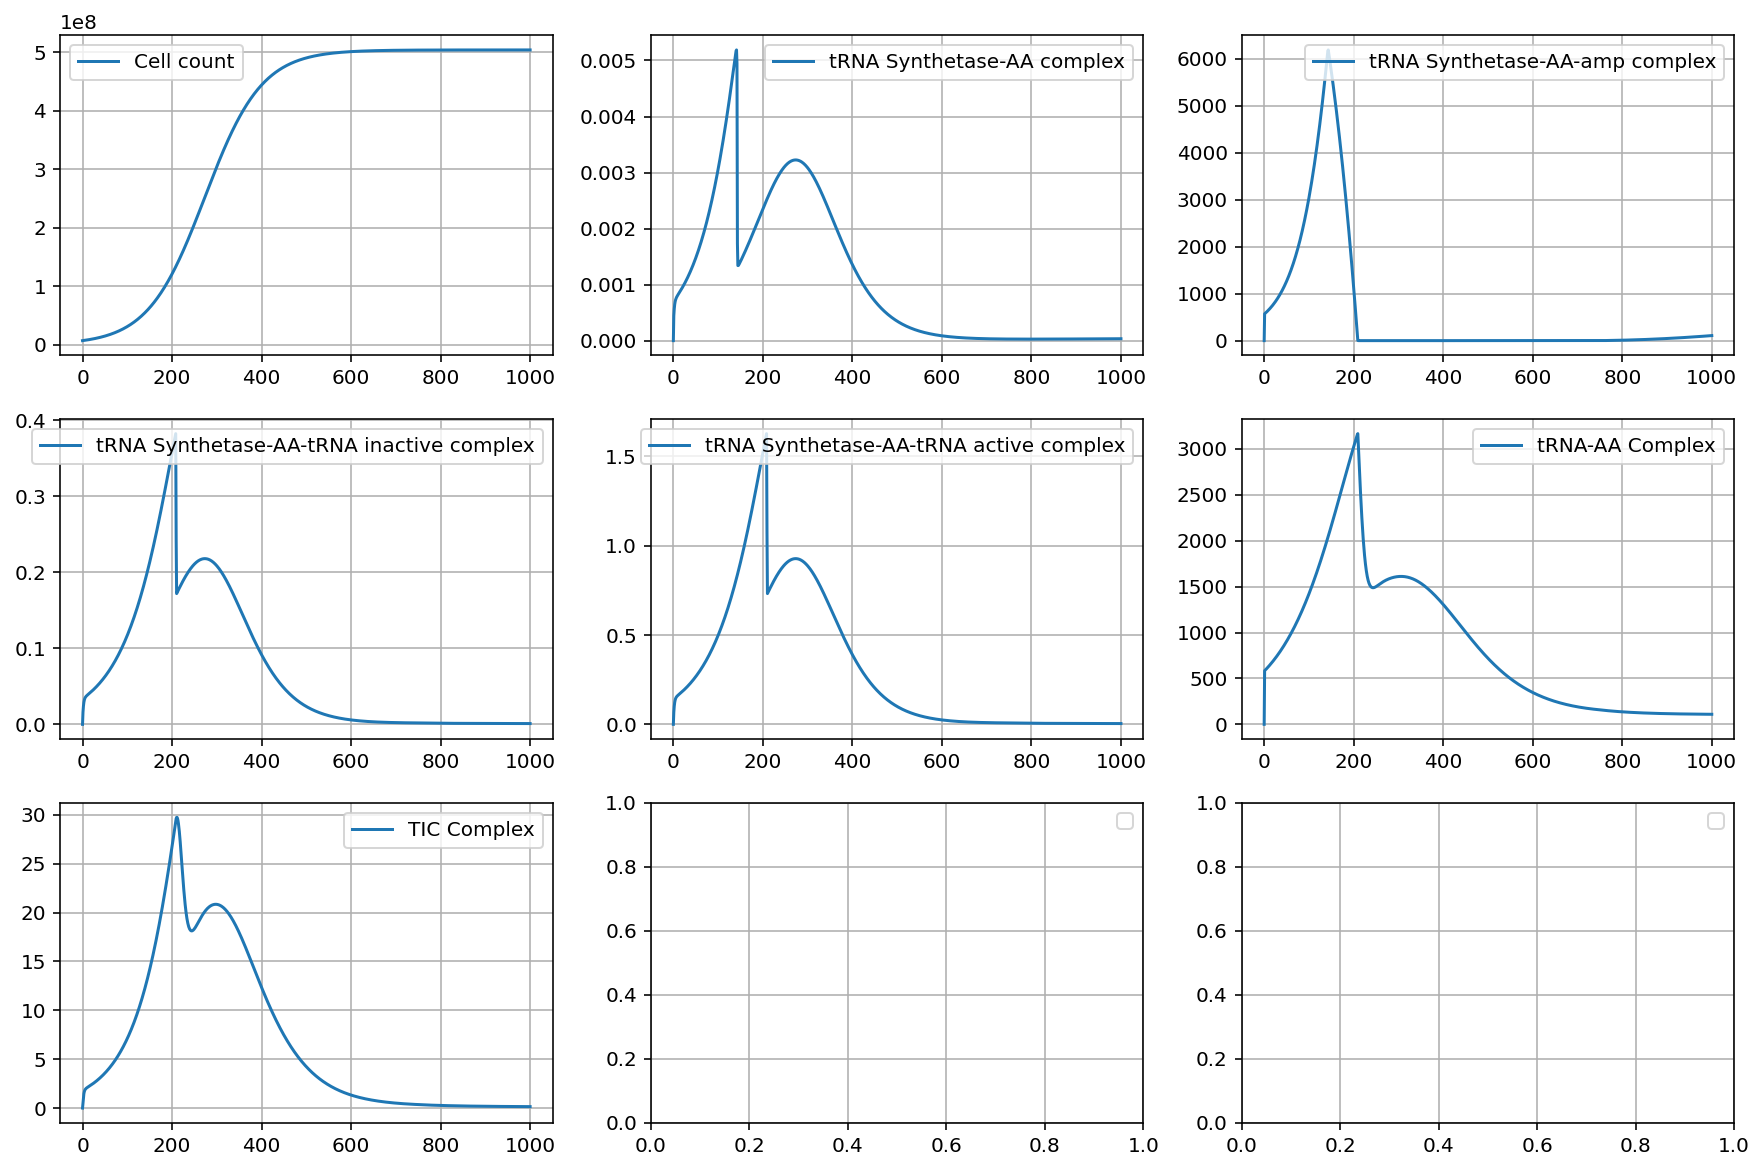

In [111]:
fig,ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15,10))
# ax.set_title("Growth dependent gene expression")

ax[0][0].plot(timepoints, sol_no_deg['cell_count_count'], label = "Cell count")
ax[0][1].plot(timepoints, sol_no_deg['complex_protein_AA_units0tl_protein_Et_machinery_'], label = "tRNA Synthetase-AA complex")
ax[0][2].plot(timepoints, sol_no_deg['complex_protein_AA_units0tl_protein_Et_machinery_amp_'], label = "tRNA Synthetase-AA-amp complex")
ax[1][0].plot(timepoints, sol_no_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_inactive_'],
label = "tRNA Synthetase-AA-tRNA inactive complex")
ax[1][1].plot(timepoints, sol_no_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_active_'],
label = "tRNA Synthetase-AA-tRNA active complex")
ax[1][2].plot(timepoints, sol_no_deg['complex_protein_AA_units0tl_protein_tRNA_machinery_'], label = "tRNA-AA Complex")
ax[2][0].plot(timepoints,sol_no_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'],
label = "TIC Complex")
# ax[2][1].plot(timepoints, R['complex_protein_protease_machinery_protein_unfolded_protein_degtag_'], 
#               label = "Unfolded Protein-Protease Complex")
# ax[2][2].plot(timepoints, R['complex_protein_RNAase_machinery_rna_T_X_'], label = "mRNA-RNAase Complex")



ax[0][0].legend() ; ax[0][0].grid(); 
ax[0][1].legend() ; ax[0][1].grid(); 
ax[0][2].legend() ; ax[0][2].grid(); 
ax[2][0].legend() ; ax[1][0].grid(); 
ax[1][0].legend() ; ax[1][1].grid(); 
ax[1][1].legend() ; ax[1][2].grid(); 
ax[1][2].legend() ; ax[2][0].grid(); 
ax[2][1].legend() ; ax[2][1].grid(); 
ax[2][2].legend() ; ax[2][2].grid(); 


In [112]:
# ## Export the data for plotting the results in datagraph (first 720 minutes only) 

# GEAGS_run_data_720min_no_deg_tag = dict()

# # Transcription related  species 
# GEAGS_run_data_720min_no_deg_tag['RNAP_total'] = RNAP_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Sigma_total'] = sigma_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['DNA_total'] =  DNA_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Nucleotide'] = sol_no_deg['protein_NT_units'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['mRNA_total'] = mrna_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['RNAase_total'] = rnaase_total[:tf_I]

# # Translation related  species 
# GEAGS_run_data_720min_no_deg_tag['Ribosome_total'] = ribo_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['tRNA_total'] = tRNA_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['tRNA_synthetase_total'] = synth_total[:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Unfolded_protein'] = sol_no_deg['protein_unfolded_protein_degtag'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Folded_protein'] = sol_no_deg['protein_X'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Peptide_chain'] = sol_no_deg['protein_peptide_chain_peptide'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Amino_acid'] = sol_no_deg['protein_AA_units0tl'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Protease_total'] = protease_total[:tf_I]

# # Transcription itermediate complexes
# GEAGS_run_data_720min_no_deg_tag['Holoenzyme'] = sol_no_deg['complex_protein_RNAP_machinery_protein_sigma_machinery_'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Open_promoter_complex'] = sol_no_deg['complex_complex_protein_RNAP_machinery_protein_sigma_machinery__dna_X_open_'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['mRNA_RNAase_complex'] = sol_no_deg['complex_protein_RNAase_machinery_rna_T_X_'][:tf_I]

# # Translation itermediate complexes
# GEAGS_run_data_720min_no_deg_tag['Et_AA_complex'] = sol_no_deg['complex_protein_AA_units0tl_protein_Et_machinery_'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Et_AA_amp_complex'] = sol_no_deg['complex_protein_AA_units0tl_protein_Et_machinery_amp_'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Et_AA_tRNA_inactive_complex'] = sol_no_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_inactive_'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Et_AA_tRNA_active_complex'] = sol_no_deg['complex_complex_protein_AA_units0tl_protein_Et_machinery_amp__protein_tRNA_machinery_active_'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['tRNA_AA_complex'] = sol_no_deg['complex_protein_AA_units0tl_protein_tRNA_machinery_'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Translation_initiation_complex'] = sol_no_deg['complex_complex_protein_AA_units0tl_protein_tRNA_machinery__protein_Ribo_machinery_rna_T_X_'][:tf_I]
# GEAGS_run_data_720min_no_deg_tag['Protease_protein_complex'] = deg_complex[:tf_I]

# GEAGS_run_data_720min_no_deg_tag['Time'] = timepoints[:tf_I]

# GEAGS_run_data_720min_no_deg_tag_df = pd.DataFrame(data = GEAGS_run_data_720min_no_deg_tag)
# GEAGS_run_data_720min_no_deg_tag_df.to_csv('simulation_data_720min_no_deg_tag.csv')


In [113]:
## Plot the values of parameters in the model 
model_degtag.get_parameter_dictionary()

{'k_tx_1b__bacterial_transcription': 0.0506465896715939,
 'k_tx_1u__bacterial_transcription': 13.659285573115495,
 'k_tx_2b__bacterial_transcription': 0.000197944385967,
 'k_tx_2u__bacterial_transcription': 0.0546170223132887,
 'b_tx_4u__mrna_degradation': 1.0,
 'n__': 5.5,
 'c_max__logistic_cell_growth': 503666666.6666667,
 'k_tx_3__bacterial_transcription': 0.0023233141592824,
 'k_rnap__bacterial_transcription': 0.0249642652969019,
 'rnap_min__bacterial_transcription': 199.39800443544928,
 'k_tl_1b__bacterial_translation': 0.4530556941495391,
 'k_tl_1u__bacterial_translation': 69930.0,
 'k_tl_2__bacterial_translation': 39960.0,
 'k_tl_3__bacterial_translation': 9.957916186719975,
 'k_tl_4__bacterial_translation': 590.884399521651,
 'k_tl_5__bacterial_translation': 138.88246948556525,
 'k_tl_6b__bacterial_translation': 0.0019687854633064,
 'k_tl_6u__bacterial_translation': 742.7109797878584,
 'k_tl_7__bacterial_translation': 3.764560142456864,
 'b_tl_7__bacterial_translation': 1.17004

In [114]:
## Export the parameter values 

param_dict = params.valuesdict()
# param_dict_guess_df = dict()
# param_dict_guess_df['Param name'] = param_dict.keys()
# param_dict_guess_df['Param'] = param_dict.values()
# param_data = pd.DataFrame(data = param_dict_guess_df)
# param_data.to_csv('GEAGS_param_file_040424_clean.csv')
param_dict

{'k_RNAP': 0.0249642652969019,
 'k_Ribo': 0.005548096339222,
 'k_tRNA': 0.0109429462378743,
 'k_Et': 0.0209996901749884,
 'k_protease': 0.0160374903203296,
 'Sigma_IC': 977.6286766768188,
 'RNAP_IC': 200.69267140359847,
 'NT_IC': 962.8496894045344,
 'RNAase_IC': 71.9931563397171,
 'Et_IC': 562.9337943527621,
 'AA_IC': 49999.872974292106,
 'tRNA_IC': 580.366757975238,
 'Ribo_IC': 794.798520431711,
 'protease_IC': 252.5132422109901,
 'Ribo_min': 173.1507088013159,
 'tRNA_min': 106.41197082233286,
 'RNAP_min': 199.39800443544928,
 'Et_min': 160.80397095986172,
 'protease_min': 175.96514536463076,
 'k_tx_1b': 0.0506465896715939,
 'k_tx_1u': 13.659285573115495,
 'k_tx_2b': 0.000197944385967,
 'k_tx_2u': 0.0546170223132887,
 'k_tx_3': 0.0023233141592824,
 'k_tx_4b': 2.549716427004064,
 'k_tx_4u': 181.7275611488472,
 'k_tx_5': 1.8811047794696207,
 'k_tl_1b': 0.4530556941495391,
 'k_tl_1u': 69930.0,
 'k_tl_2': 39960.0,
 'k_tl_3': 9.957916186719975,
 'k_tl_4': 590.884399521651,
 'k_tl_5': 138.8

### Some analyses done with the model

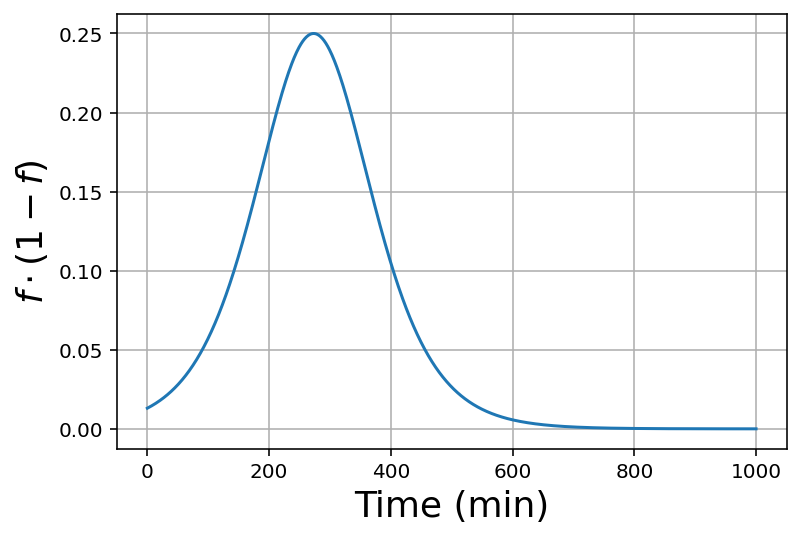

In [115]:
## Plot the RMF gamma 

f = sol_deg['cell_count_count']/param_dict['C_max']

plt.plot(timepoints, f * (1 - f))
plt.xlabel('Time (min)', fontsize = 18)
plt.ylabel(r'$f \cdot (1 -f)$', fontsize = 18)
plt.grid(True)

Text(0.5, 1.0, 'Without deg-tag')

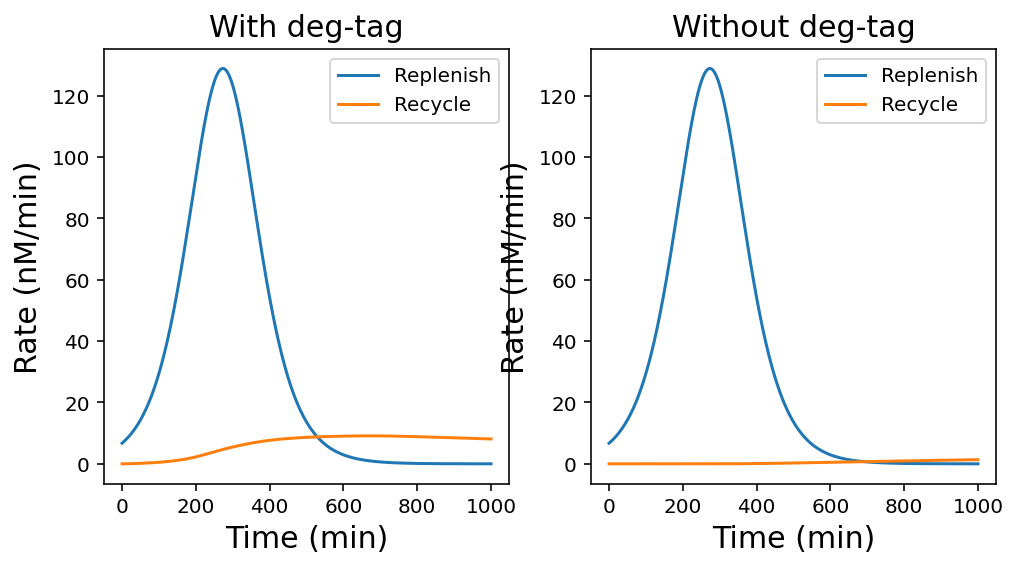

In [116]:
## Comparing the amino acid replenishment in both models 

k_rep_sol_deg = param_dict['k_tl_12'] * f * (1 - f)
k_rec_sol_deg = param_dict['k_tl_11'] * sol_deg['protein_peptide_chain_peptide']

k_rep_sol_no_deg = param_dict['k_tl_12'] * f * (1 - f)
k_rec_sol_no_deg = param_dict['k_tl_11'] * sol_no_deg['protein_peptide_chain_peptide']

fig, ax = plt.subplots(1,2, figsize = (8,4))

ax[0].plot(timepoints, k_rep_sol_deg, label = 'Replenish')
ax[0].plot(timepoints, k_rec_sol_deg, label = 'Recycle')
ax[0].set_xlabel('Time (min)', fontsize = 15) ; ax[0].set_ylabel('Rate (nM/min)', fontsize = 15)
ax[0].legend(); ax[0].set_title('With deg-tag', fontsize = 15)

ax[1].plot(timepoints, k_rep_sol_no_deg, label = 'Replenish')
ax[1].plot(timepoints, k_rec_sol_no_deg, label = 'Recycle')
ax[1].set_xlabel('Time (min)', fontsize = 15) ; ax[1].set_ylabel('Rate (nM/min)', fontsize = 15)
ax[1].legend(); ax[1].set_title('Without deg-tag', fontsize = 15)

Text(0.5, 1.0, 'Without deg-tag')

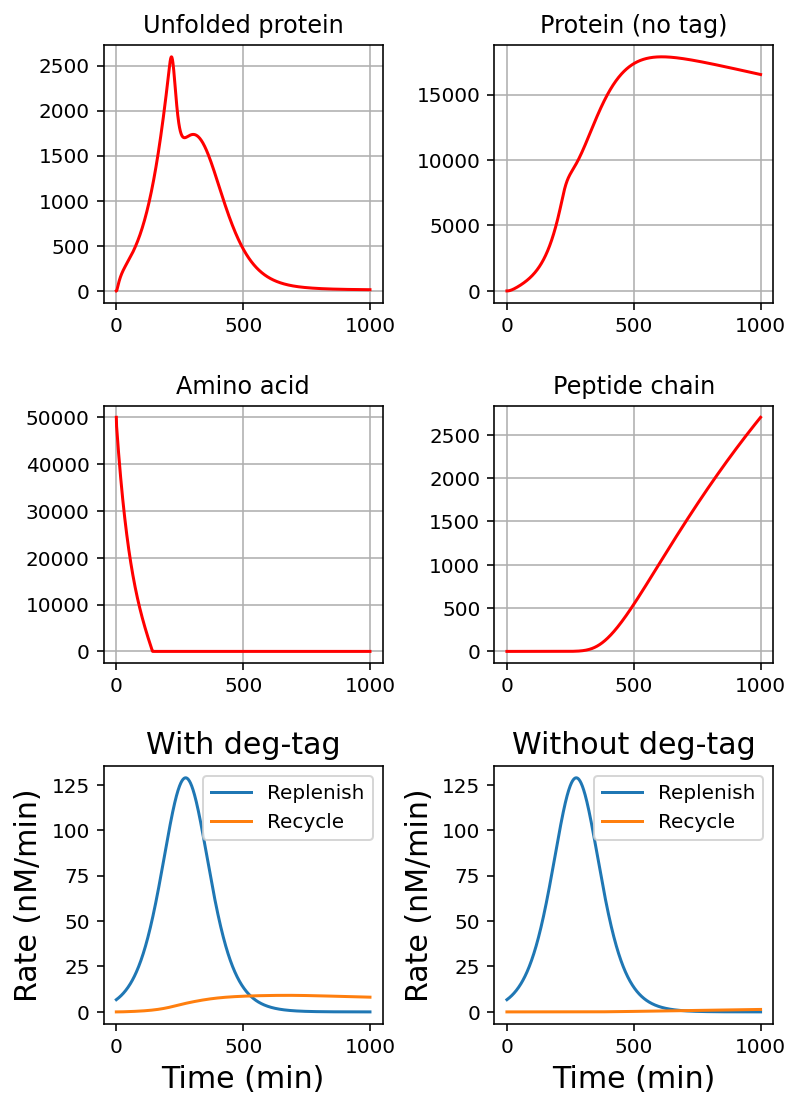

In [117]:
## Plot selected species 

fig, ax = plt.subplots(3,2, figsize = (6,9))
fig.subplots_adjust(wspace = 0.4, hspace = 0.4)

# r,c = 0,0
# ax[r,c].plot(timepoints, RNAP_total)
# ax[r,c].set_title('RNAP Total')
# ax[r,c].grid(True)

# r,c = 0,1
# ax[r,c].plot(timepoints, mrna_total)
# ax[r,c].set_title('mRNA Total')
# ax[r,c].grid(True)

# r,c = 0,2
# ax[r,c].plot(timepoints, tRNA_total)
# ax[r,c].set_title('tRNA Total')
# ax[r,c].grid(True)

# r,c = 1,0
# ax[r,c].plot(timepoints, ribo_total)
# ax[r,c].set_title('Ribo Total')
# ax[r,c].grid(True)

r,c = 0,0
ax[r,c].plot(timepoints, sol_no_deg['protein_unfolded_protein_degtag'], 'r')
ax[r,c].set_title('Unfolded protein')
ax[r,c].grid(True)

r,c = 0,1
ax[r,c].plot(timepoints, sol_no_deg['protein_X'], 'r')
ax[r,c].set_title('Protein (no tag)')
ax[r,c].grid(True)

r,c = 1,0
ax[r,c].plot(timepoints[:], sol_no_deg['protein_AA_units0tl'][:], 'r')
# axins = inset_axes(ax[r,c], width = '40%', height = '40%', loc = 'upper right') # zoom = 6
# axins.plot(timepoints[150:600], sol_no_deg['protein_AA_units0tl'][150:600], 'r')
# mark_inset(ax[r,c], axins, loc1 = 2, loc2 = 4, fc = "none", ec = "0.5")
ax[r,c].set_title('Amino acid')
ax[r,c].grid(True)

r,c = 1,1
ax[r,c].plot(timepoints, sol_no_deg['protein_peptide_chain_peptide'], 'r')
ax[r,c].set_title('Peptide chain')
ax[r,c].grid(True)

# r,c = 2,2
# ax[r,c].plot(timepoints, sol_no_deg['cell_count_count'])
# #ax[r,c].set_title('Cell count')
# ax[r,c].grid(True)

r,c = 2,0
ax[r,c].plot(timepoints, k_rep_sol_deg, label = 'Replenish')
ax[r,c].plot(timepoints, k_rec_sol_deg, label = 'Recycle')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Rate (nM/min)', fontsize = 15)
ax[r,c].legend(); ax[r,c].set_title('With deg-tag', fontsize = 15)

r,c = 2,1
ax[r,c].plot(timepoints, k_rep_sol_no_deg, label = 'Replenish')
ax[r,c].plot(timepoints, k_rec_sol_no_deg, label = 'Recycle')
ax[r,c].set_xlabel('Time (min)', fontsize = 15) ; ax[r,c].set_ylabel('Rate (nM/min)', fontsize = 15)
ax[r,c].legend(); ax[r,c].set_title('Without deg-tag', fontsize = 15)

Text(0.5, 1.0, 'Without deg-tag')

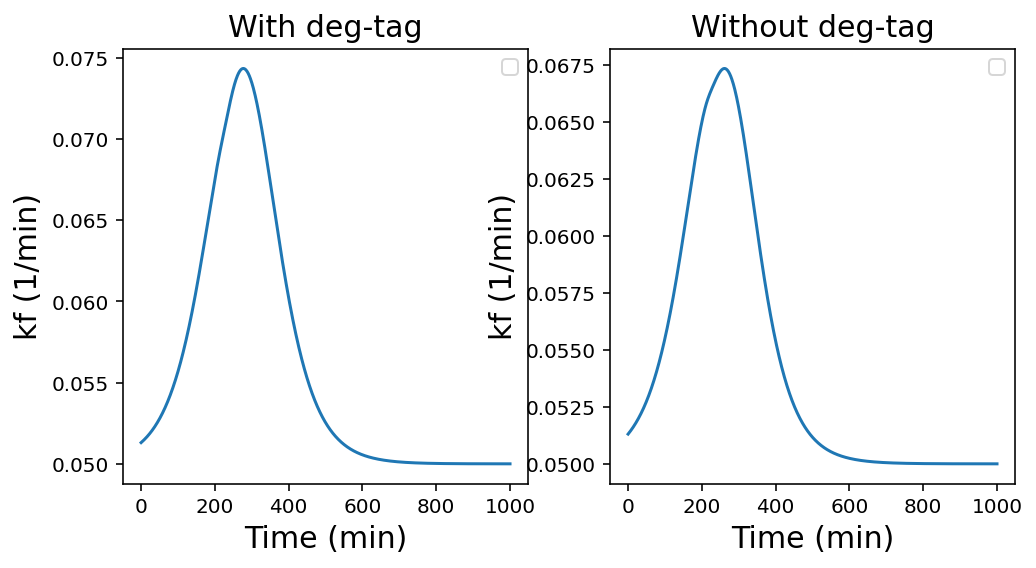

In [118]:
# Plot the protein folding rate in two models 

folding_rmf_deg = param_dict['k_tl_8'] * (f * (1 - f) * (1 - sol_deg['protein_X']/param_dict['P_max']) + param_dict['b_tl_8'])
folding_rmf_no_deg = param_dict['k_tl_8'] * (f * (1 - f) * (1 - sol_no_deg['protein_X']/param_dict['P_max']) + param_dict['b_tl_8'])

# folding_rmf_deg = sol_deg['protein_unfolded_protein_degtag'] * (f * (1 - f) * (1 - sol_deg['protein_X']/param_dict['P_max']) + param_dict['b_tl_8']) * param_dict['k_tl_8']
# folding_rmf_no_deg = sol_no_deg['protein_unfolded_protein_degtag'] * (f * (1 - f) * (1 - sol_no_deg['protein_X']/param_dict['P_max']) + param_dict['b_tl_8']) * param_dict['k_tl_8']

fig, ax = plt.subplots(1,2, figsize = (8,4))

ax[0].plot(timepoints, folding_rmf_deg)
#ax[0].plot(timepoints, k_rec_sol_deg, label = 'Recycle')
ax[0].set_xlabel('Time (min)', fontsize = 15) ; ax[0].set_ylabel('kf (1/min)', fontsize = 15)
ax[0].legend(); ax[0].set_title('With deg-tag', fontsize = 15)

ax[1].plot(timepoints, folding_rmf_no_deg)
#ax[1].plot(timepoints, k_rec_sol_no_deg, label = 'Recycle')
ax[1].set_xlabel('Time (min)', fontsize = 15) ; ax[1].set_ylabel('kf (1/min)', fontsize = 15)
ax[1].legend(); ax[1].set_title('Without deg-tag', fontsize = 15)